<a href="https://colab.research.google.com/github/Kussssssss/CS114.O21/blob/main/CS114_2024_DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÔ TẢ BÀI TOÁN

- Input: Chữ số viết tay
- Output: Kết quả nhận dạng

Tham khảo: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

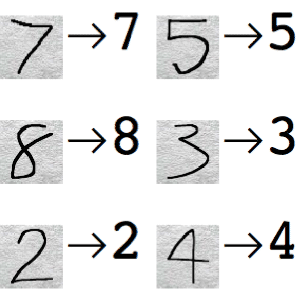

# MNIST Handwritten Digit Classification Dataset

- Các ảnh greyscale có kích thước 28x28

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


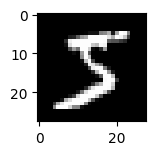

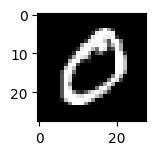

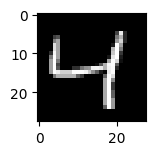

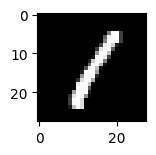

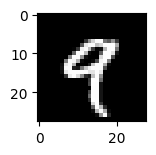

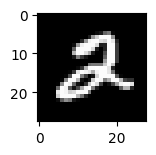

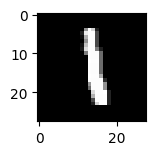

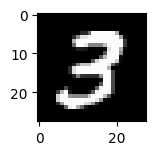

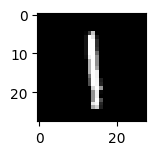

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
  # show the figure
  plt.show()

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

## Load Dataset

- we know that the images are all pre-aligned (e.g. each image only contains a hand-drawn digit), that the images all have the same square size of 28×28 pixels, and that the images are grayscale. Therefore, we can load the images and reshape the data arrays to have a single color channel.
- a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes

In [ ]:
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()

  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

## Prepare Pixel Data

- We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

- We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

- A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [ ]:
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  # return normalized images
  return train_norm, test_norm

## Define Model



In [ ]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

## Evaluate Model

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()

  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)

  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):

    # define model
    model = define_model()

    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

    # stores scores
    scores.append(acc)
    histories.append(history)

  return scores, histories

## Present Results

In [ ]:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')

    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [ ]:
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

  # box and whisker plots of results
  plt.boxplot(scores)
  plt.show()

In [ ]:
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()

  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)

  # evaluate model
  scores, histories = evaluate_model(trainX, trainY)

  # learning curves
  summarize_diagnostics(histories)

  # summarize estimated performance
  summarize_performance(scores)

> 98.733


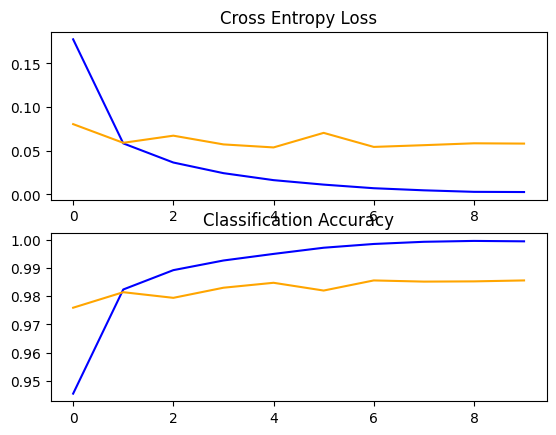

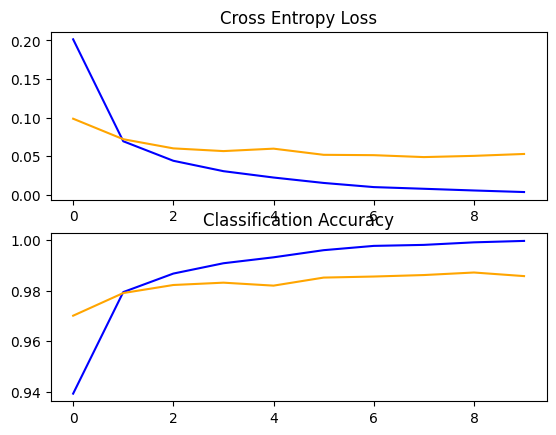

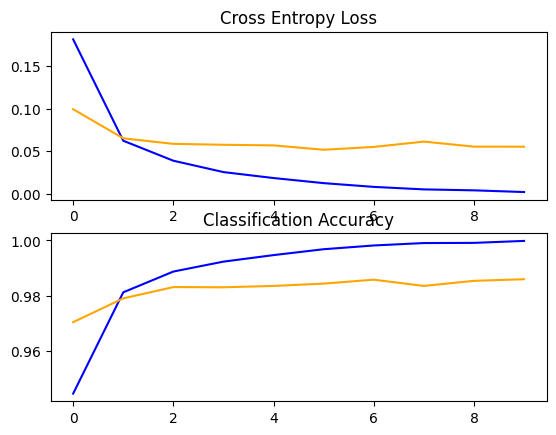

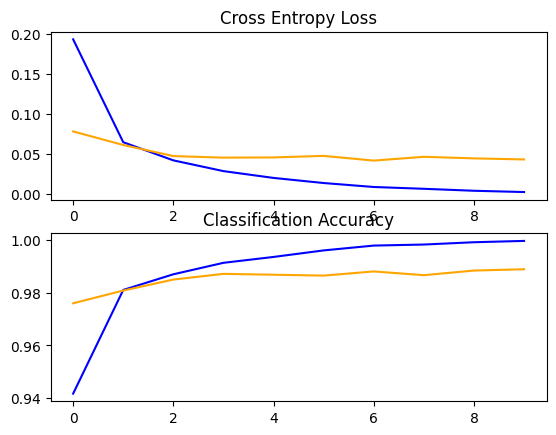

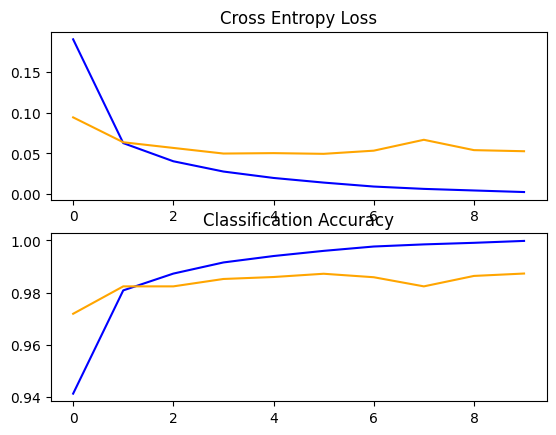

Accuracy: mean=98.670 std=0.127, n=5


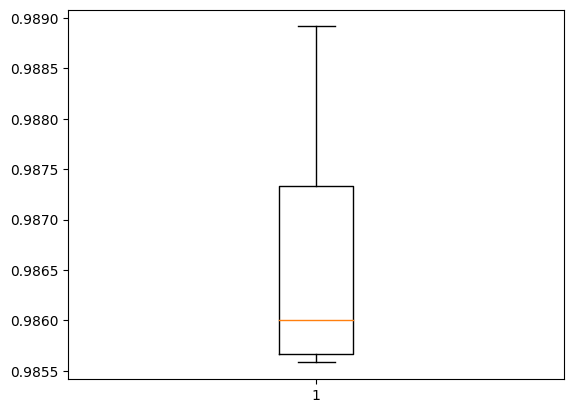

In [ ]:
# entry point, run the test harness
run_test_harness()

## Save Final Model

In [ ]:
# run the test harness for evaluating a model
def run_test_harness2():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()

  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()

  # fit model
  model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)

  # save model
  model.save('final_model.h5')

## Evaluate Final Model

In [ ]:
run_test_harness2()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Make Prediction

In [4]:
def load_image(filename):
  # load the image
  img = load_img(filename, grayscale=True, target_size=(28, 28))

  # convert to array
  img = img_to_array(img)

  # reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28, 1)

  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0

  return img

**Hàm run_model dưới đây dùng để duyệt qua từng ảnh trong các file chứa các ảnh từ 0 đến 9 trong dữ liệu trong google drive**


*   Phương pháp này dùng hàm load_image ở trên để xử lí ảnh đưa vào
*   Hàm in ra các ảnh và dự đoán của nó, trả về số dự đoán đúng và số dự đoán sai

*   Hàm chạy theo final_model.h5 đã được huấn luyện

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 2s 2s/step
Image: 0 and Prediction class: 8


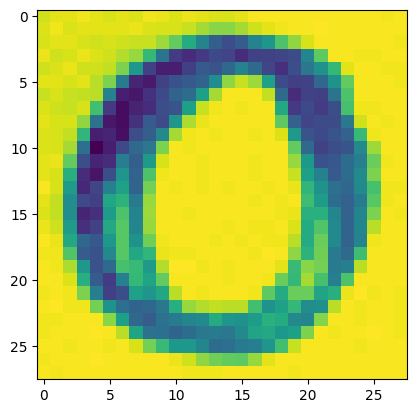

1/1 [==============================] - 0s 16ms/step
Image: 0 and Prediction class: 8


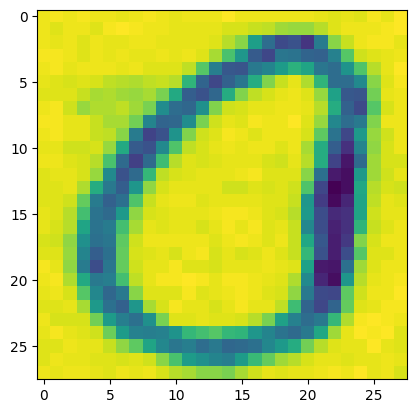

1/1 [==============================] - 0s 35ms/step
Image: 0 and Prediction class: 6


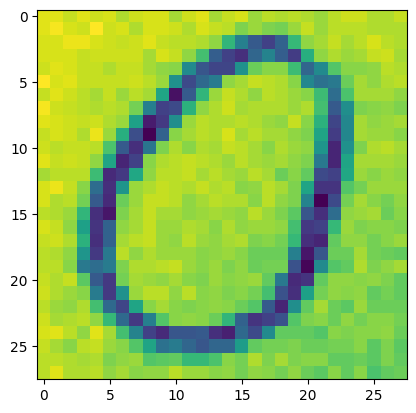

1/1 [==============================] - 0s 105ms/step
Image: 1 and Prediction class: 6


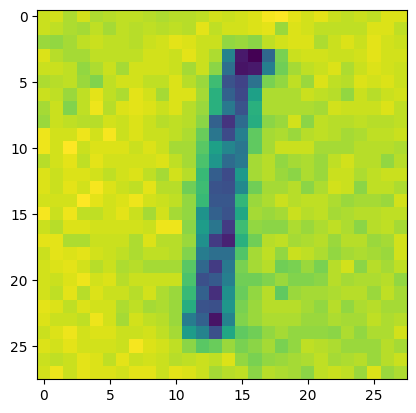

1/1 [==============================] - 0s 29ms/step
Image: 1 and Prediction class: 6


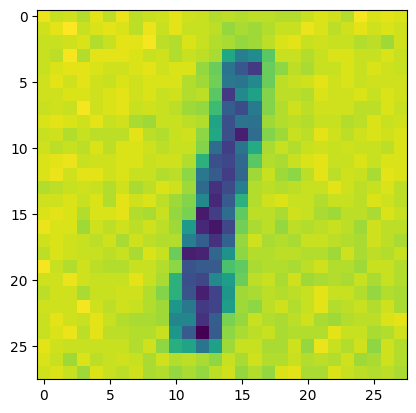

1/1 [==============================] - 0s 25ms/step
Image: 1 and Prediction class: 6


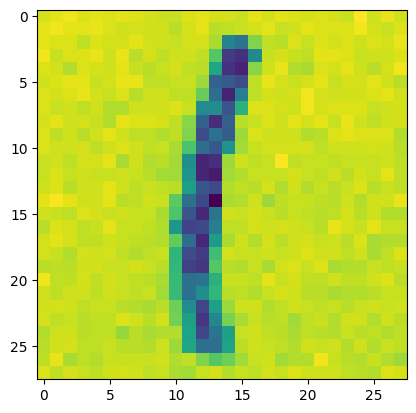

1/1 [==============================] - 0s 41ms/step
Image: 2 and Prediction class: 6


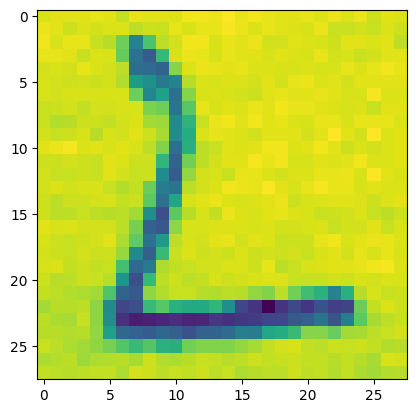

1/1 [==============================] - 0s 56ms/step
Image: 2 and Prediction class: 2


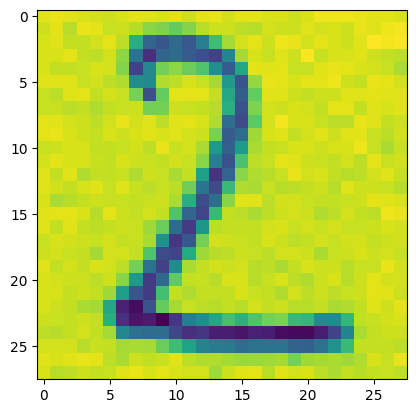

1/1 [==============================] - 0s 61ms/step
Image: 2 and Prediction class: 6


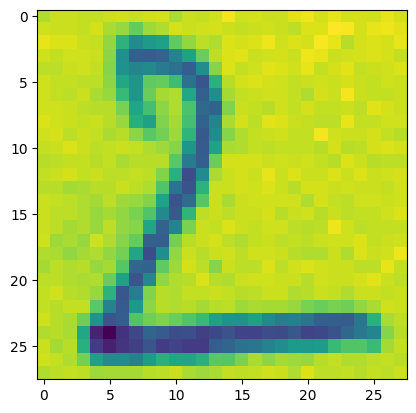

1/1 [==============================] - 0s 17ms/step
Image: 3 and Prediction class: 6


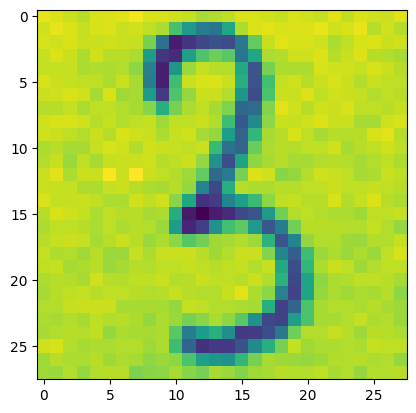

1/1 [==============================] - 0s 43ms/step
Image: 3 and Prediction class: 6


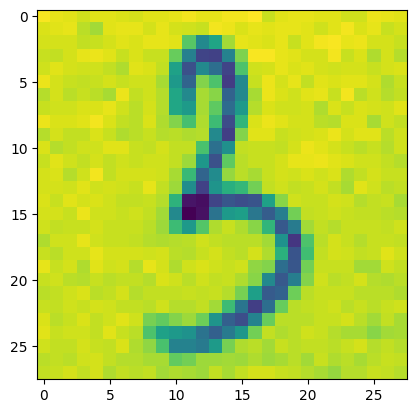

1/1 [==============================] - 0s 27ms/step
Image: 3 and Prediction class: 6


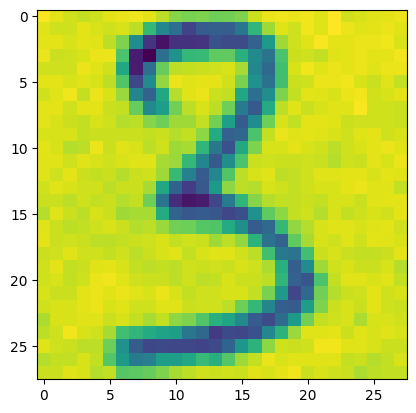

1/1 [==============================] - 0s 30ms/step
Image: 4 and Prediction class: 3


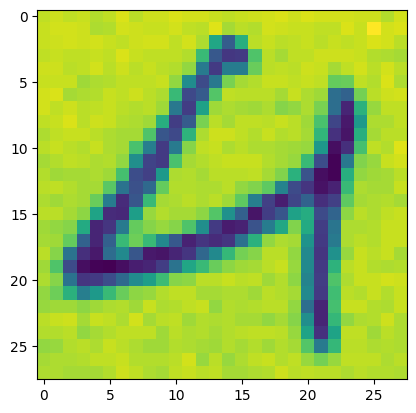

1/1 [==============================] - 0s 28ms/step
Image: 4 and Prediction class: 2


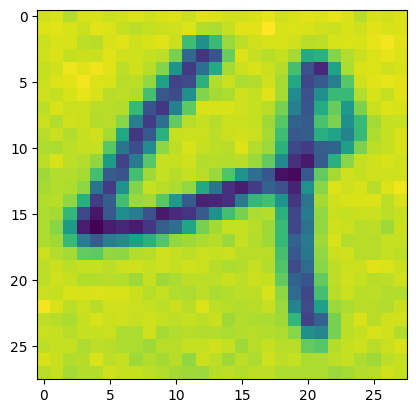

1/1 [==============================] - 0s 26ms/step
Image: 4 and Prediction class: 2


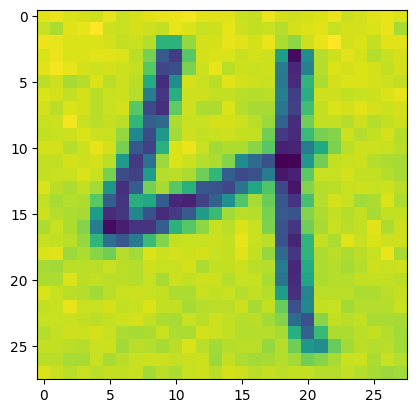

1/1 [==============================] - 0s 19ms/step
Image: 5 and Prediction class: 8


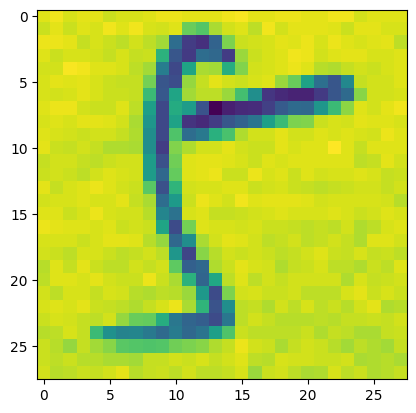

1/1 [==============================] - 0s 26ms/step
Image: 5 and Prediction class: 6


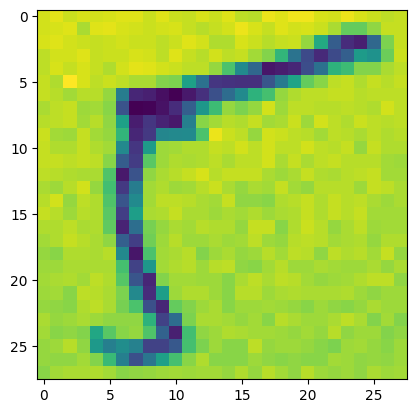

1/1 [==============================] - 0s 17ms/step
Image: 5 and Prediction class: 6


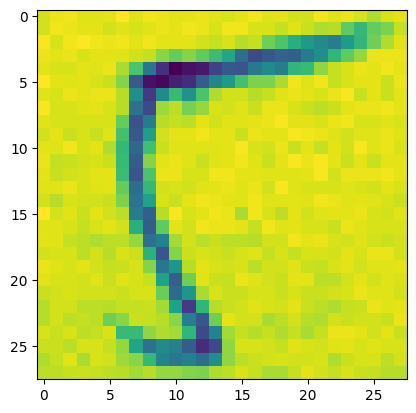

1/1 [==============================] - 0s 19ms/step
Image: 6 and Prediction class: 6


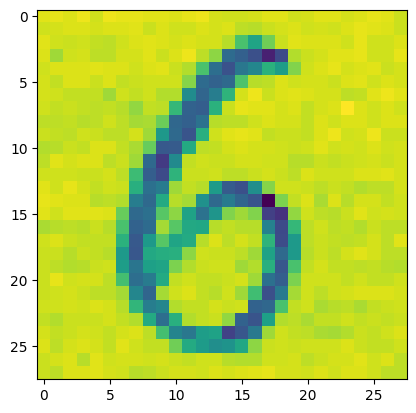

1/1 [==============================] - 0s 18ms/step
Image: 6 and Prediction class: 6


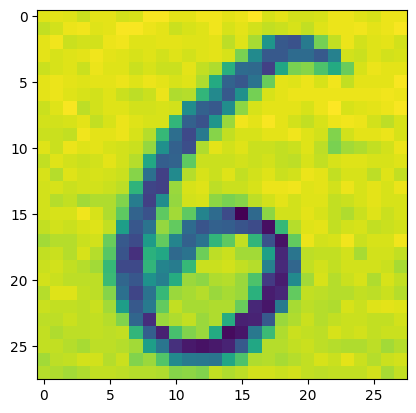

1/1 [==============================] - 0s 17ms/step
Image: 6 and Prediction class: 6


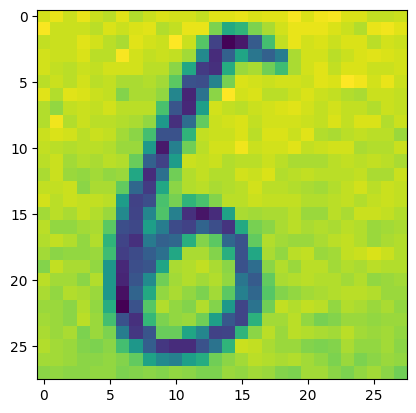

1/1 [==============================] - 0s 16ms/step
Image: 7 and Prediction class: 8


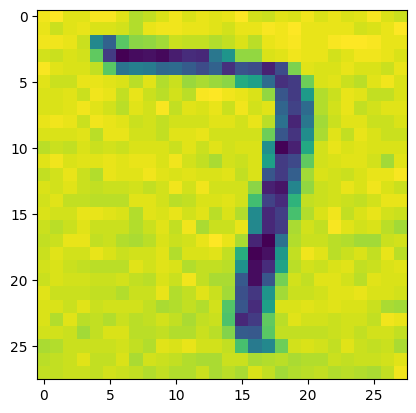

1/1 [==============================] - 0s 29ms/step
Image: 7 and Prediction class: 8


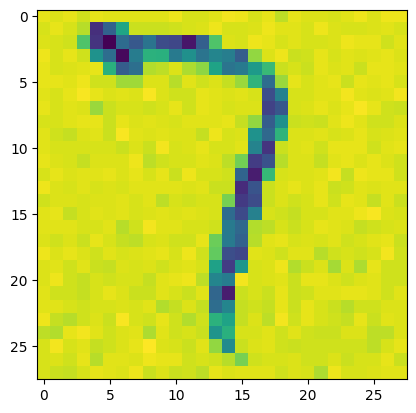

1/1 [==============================] - 0s 36ms/step
Image: 7 and Prediction class: 8


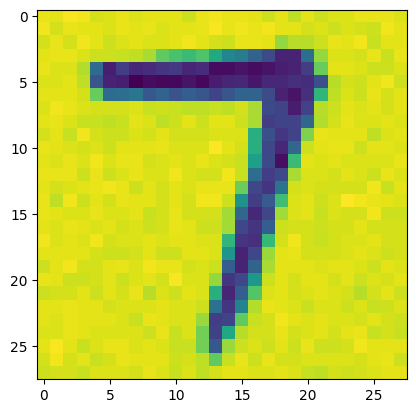

1/1 [==============================] - 0s 17ms/step
Image: 8 and Prediction class: 6


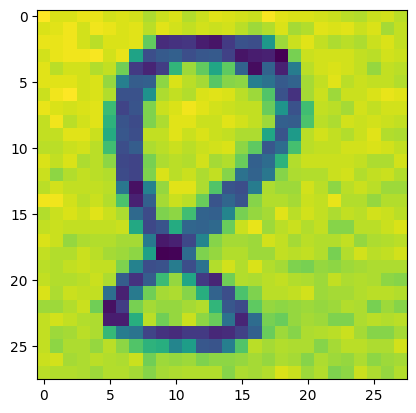

1/1 [==============================] - 0s 19ms/step
Image: 8 and Prediction class: 8


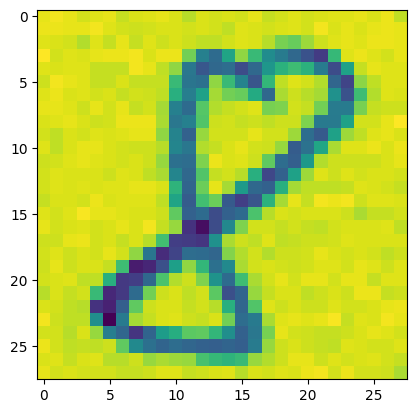

1/1 [==============================] - 0s 18ms/step
Image: 8 and Prediction class: 8


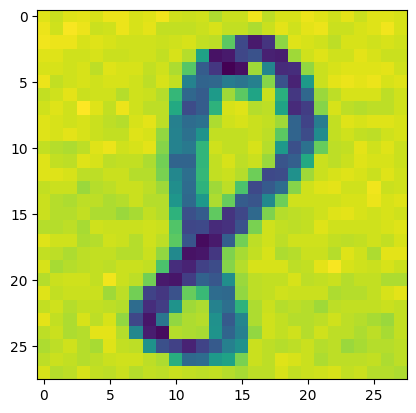

1/1 [==============================] - 0s 17ms/step
Image: 9 and Prediction class: 8


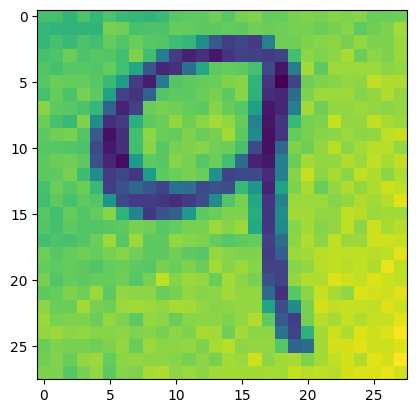

1/1 [==============================] - 0s 24ms/step
Image: 9 and Prediction class: 8


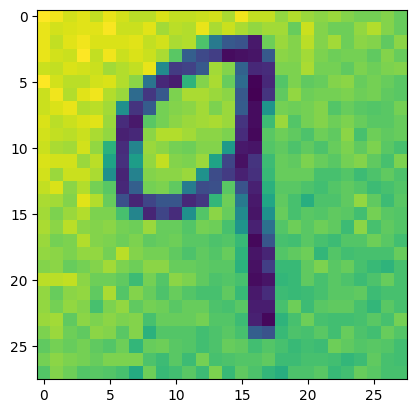

1/1 [==============================] - 0s 29ms/step
Image: 9 and Prediction class: 8


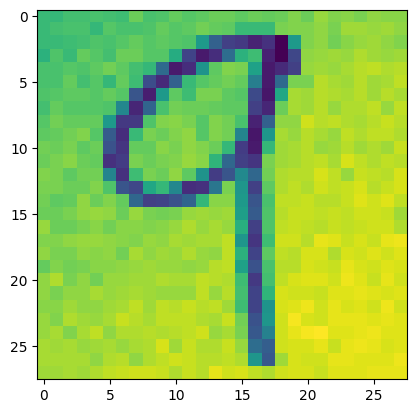

1/1 [==============================] - 0s 20ms/step
Image: 0 and Prediction class: 3


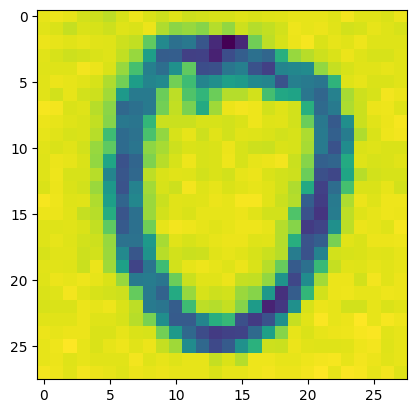

1/1 [==============================] - 0s 18ms/step
Image: 0 and Prediction class: 6


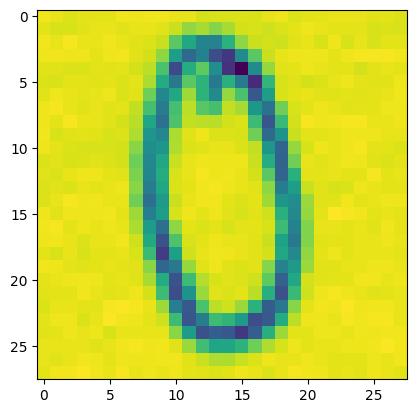

1/1 [==============================] - 0s 17ms/step
Image: 0 and Prediction class: 0


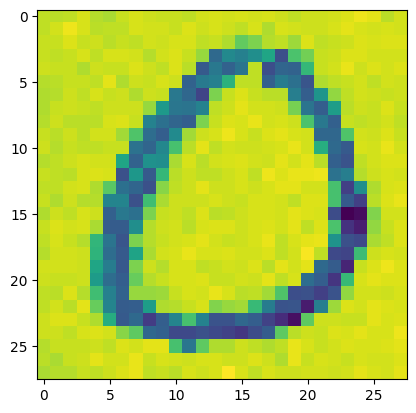

1/1 [==============================] - 0s 18ms/step
Image: 1 and Prediction class: 4


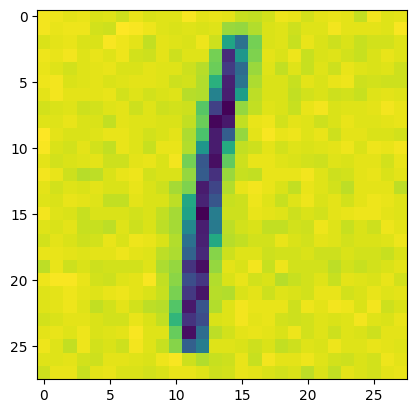

1/1 [==============================] - 0s 24ms/step
Image: 1 and Prediction class: 6


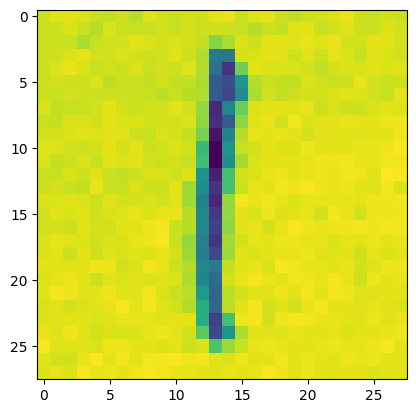

1/1 [==============================] - 0s 19ms/step
Image: 1 and Prediction class: 4


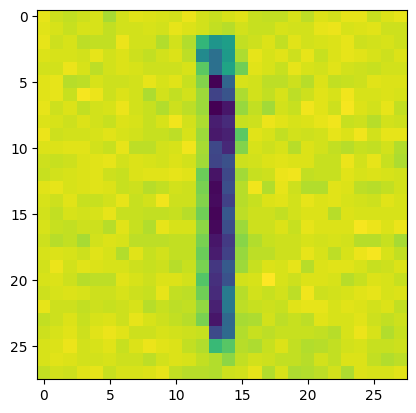

1/1 [==============================] - 0s 17ms/step
Image: 2 and Prediction class: 2


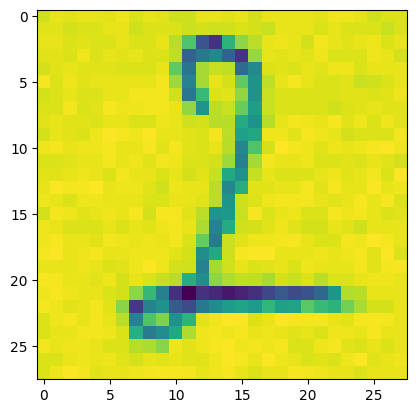

1/1 [==============================] - 0s 18ms/step
Image: 2 and Prediction class: 6


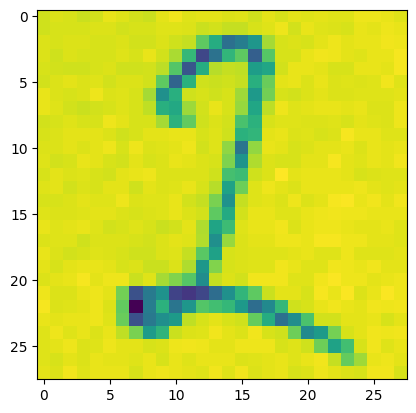

1/1 [==============================] - 0s 20ms/step
Image: 2 and Prediction class: 8


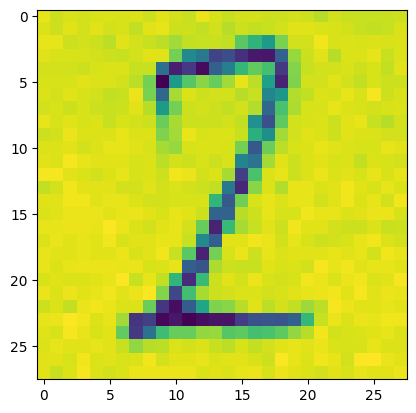

1/1 [==============================] - 0s 17ms/step
Image: 3 and Prediction class: 6


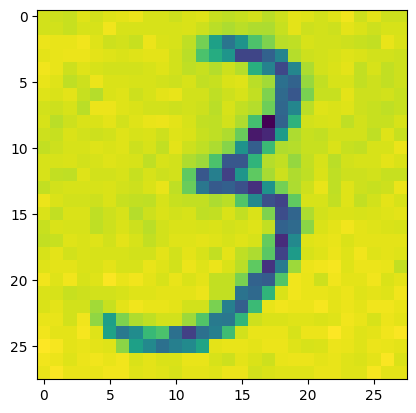

1/1 [==============================] - 0s 17ms/step
Image: 3 and Prediction class: 0


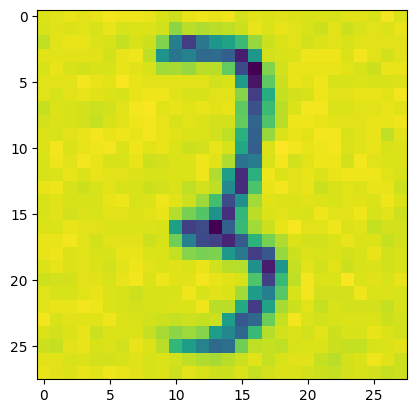

1/1 [==============================] - 0s 17ms/step
Image: 3 and Prediction class: 3


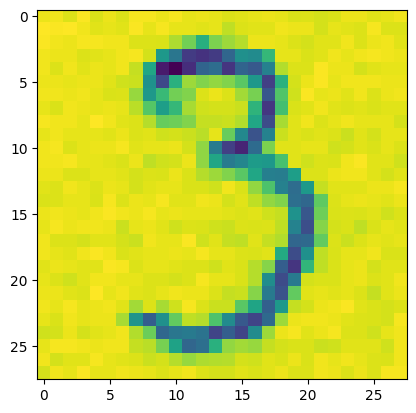

1/1 [==============================] - 0s 17ms/step
Image: 4 and Prediction class: 4


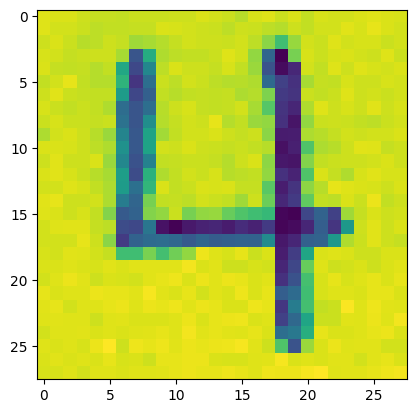

1/1 [==============================] - 0s 17ms/step
Image: 4 and Prediction class: 6


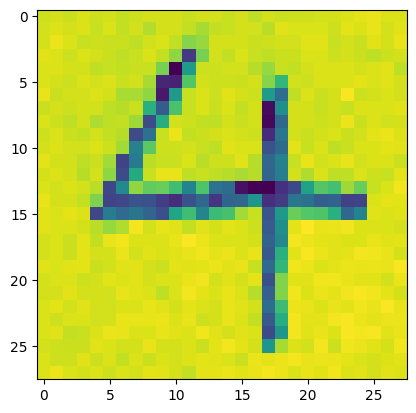

1/1 [==============================] - 0s 39ms/step
Image: 4 and Prediction class: 2


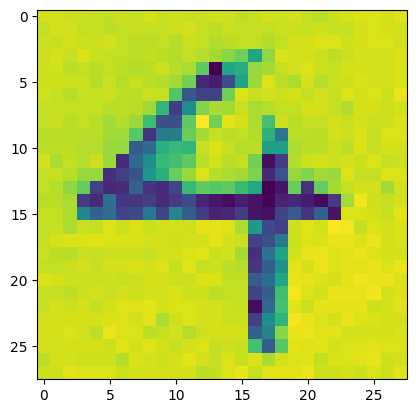

1/1 [==============================] - 0s 126ms/step
Image: 5 and Prediction class: 8


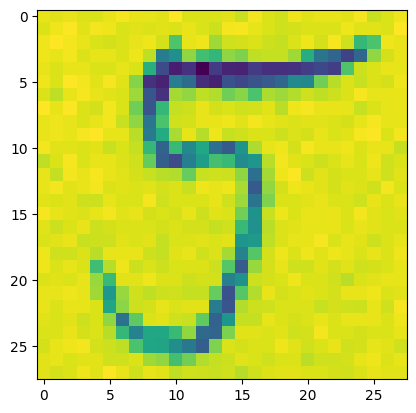

1/1 [==============================] - 0s 29ms/step
Image: 5 and Prediction class: 8


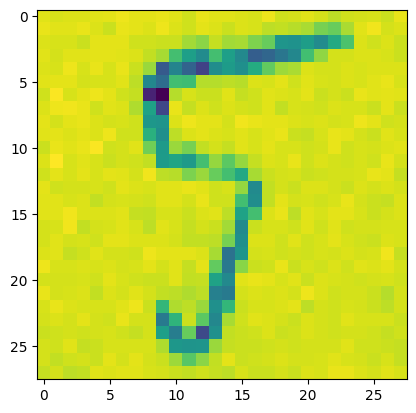

1/1 [==============================] - 0s 25ms/step
Image: 5 and Prediction class: 2


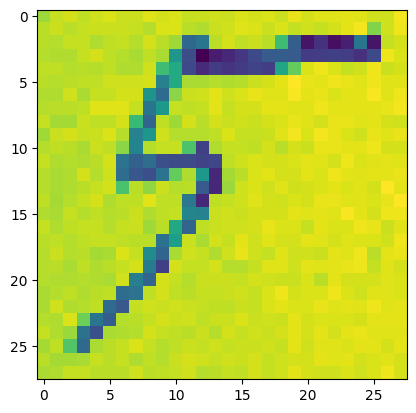

1/1 [==============================] - 0s 18ms/step
Image: 6 and Prediction class: 6


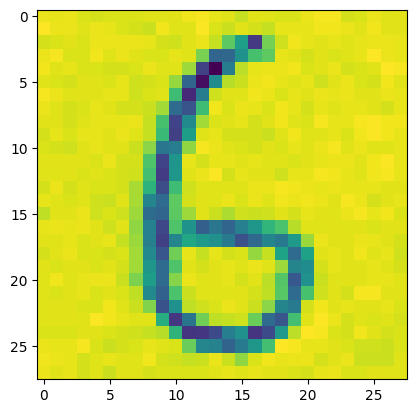

1/1 [==============================] - 0s 17ms/step
Image: 6 and Prediction class: 5


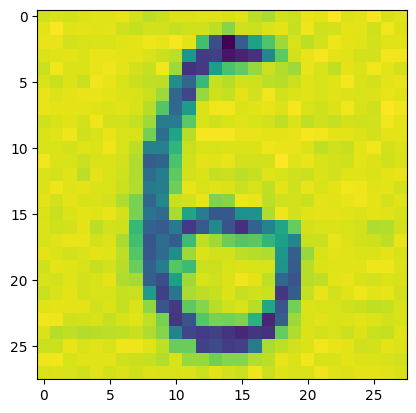

1/1 [==============================] - 0s 17ms/step
Image: 6 and Prediction class: 6


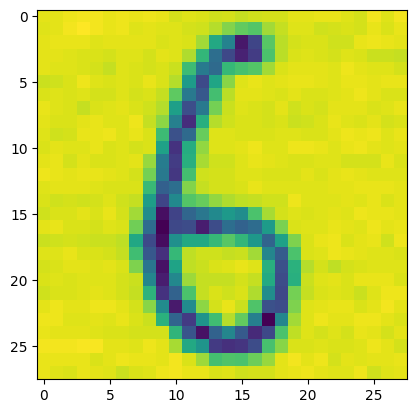

1/1 [==============================] - 0s 17ms/step
Image: 7 and Prediction class: 2


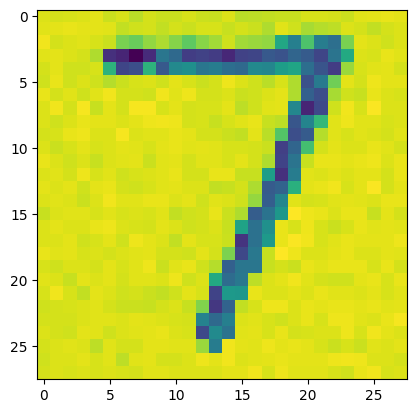

1/1 [==============================] - 0s 16ms/step
Image: 7 and Prediction class: 8


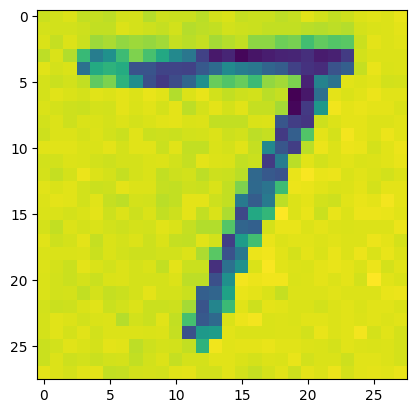

1/1 [==============================] - 0s 28ms/step
Image: 7 and Prediction class: 8


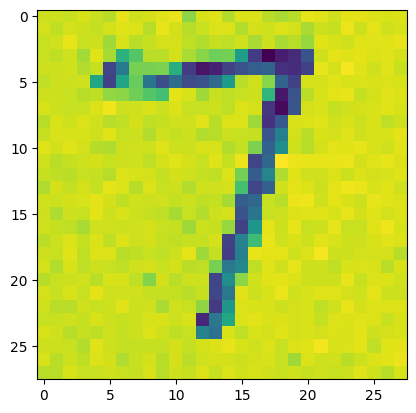

1/1 [==============================] - 0s 51ms/step
Image: 8 and Prediction class: 8


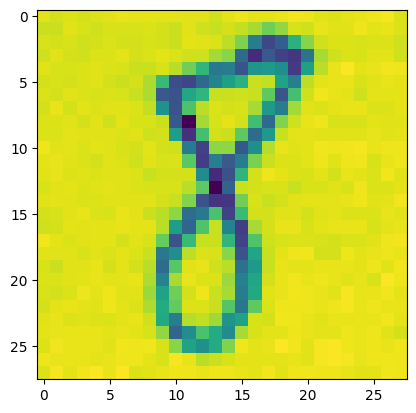

1/1 [==============================] - 0s 17ms/step
Image: 8 and Prediction class: 8


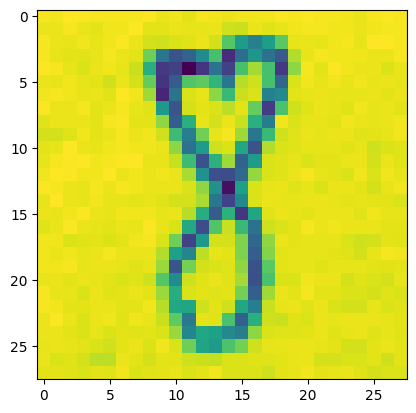

1/1 [==============================] - 0s 18ms/step
Image: 8 and Prediction class: 2


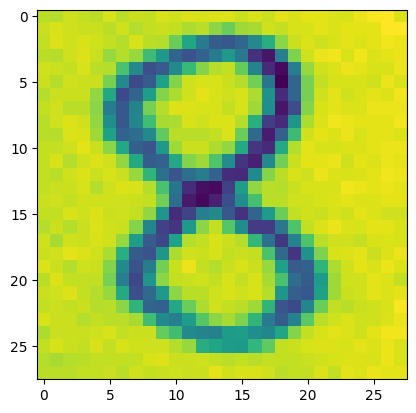

1/1 [==============================] - 0s 16ms/step
Image: 9 and Prediction class: 4


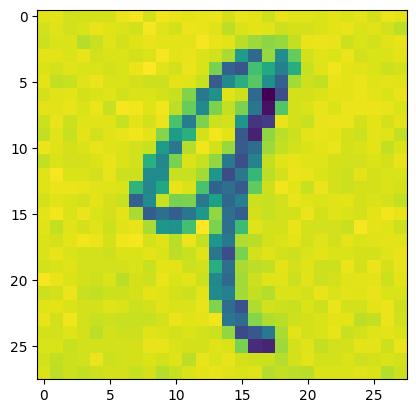

1/1 [==============================] - 0s 18ms/step
Image: 9 and Prediction class: 8


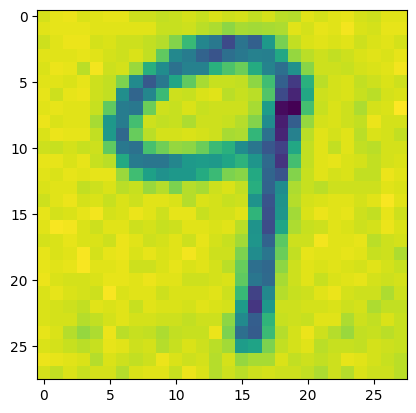

1/1 [==============================] - 0s 16ms/step
Image: 9 and Prediction class: 8


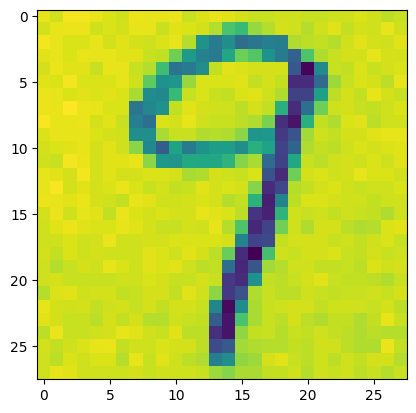

1/1 [==============================] - 0s 16ms/step
Image: 0 and Prediction class: 6


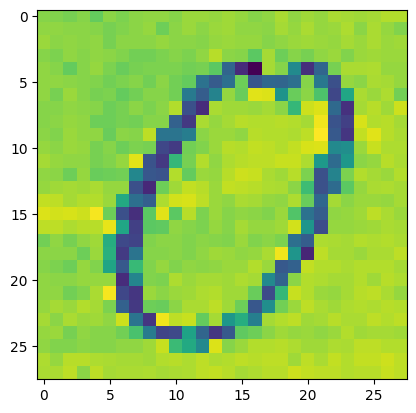

1/1 [==============================] - 0s 29ms/step
Image: 0 and Prediction class: 0


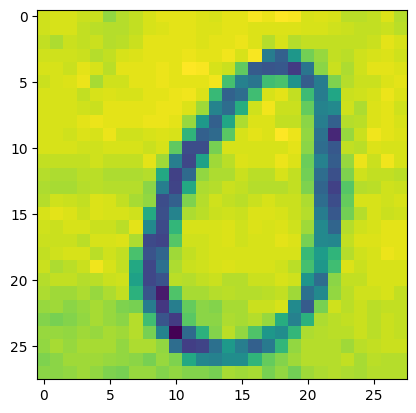

1/1 [==============================] - 0s 65ms/step
Image: 0 and Prediction class: 3


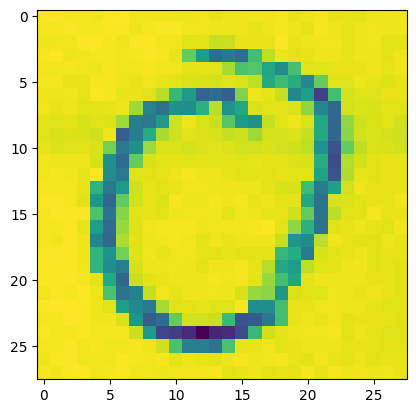

1/1 [==============================] - 0s 28ms/step
Image: 1 and Prediction class: 6


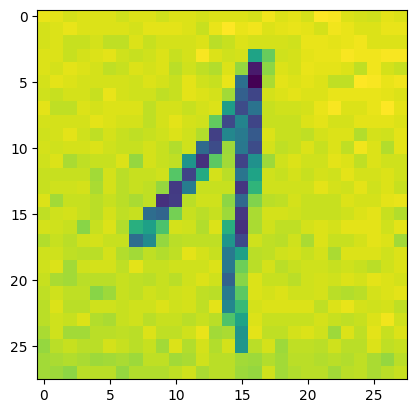

1/1 [==============================] - 0s 16ms/step
Image: 1 and Prediction class: 8


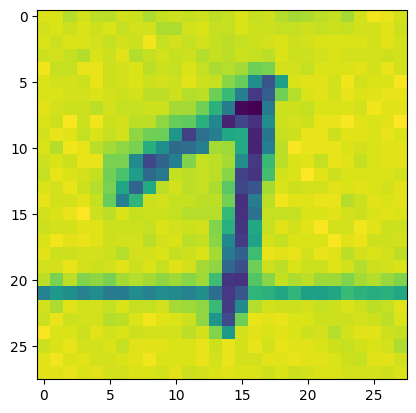

1/1 [==============================] - 0s 17ms/step
Image: 1 and Prediction class: 6


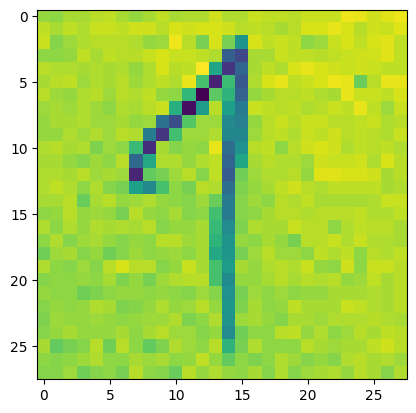

1/1 [==============================] - 0s 16ms/step
Image: 2 and Prediction class: 2


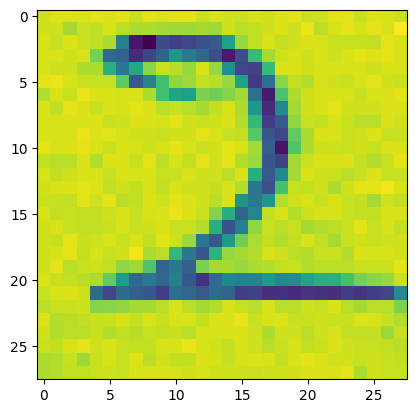

1/1 [==============================] - 0s 17ms/step
Image: 2 and Prediction class: 6


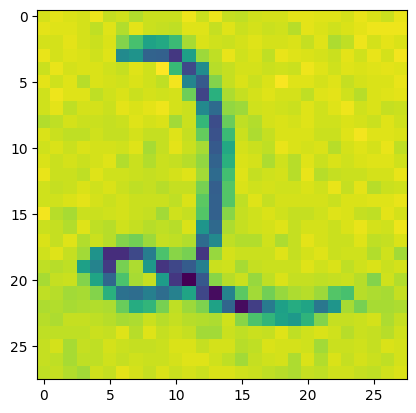

1/1 [==============================] - 0s 16ms/step
Image: 2 and Prediction class: 2


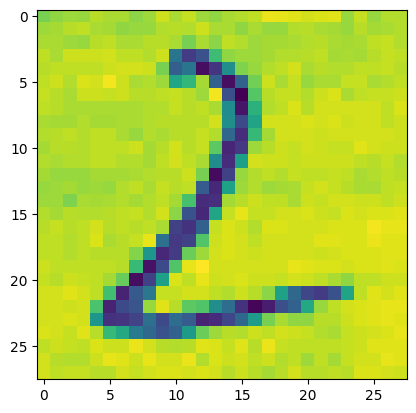

1/1 [==============================] - 0s 16ms/step
Image: 3 and Prediction class: 6


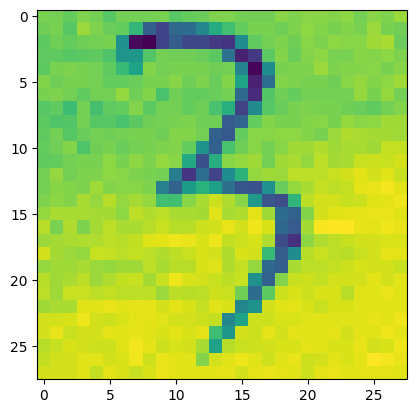

1/1 [==============================] - 0s 24ms/step
Image: 3 and Prediction class: 8


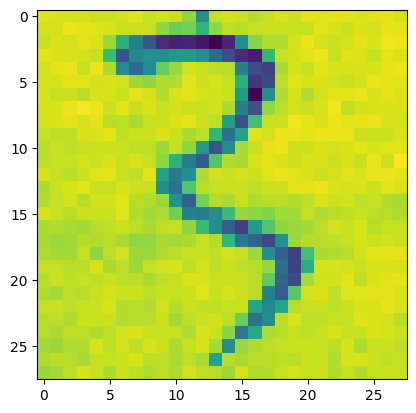

1/1 [==============================] - 0s 16ms/step
Image: 3 and Prediction class: 3


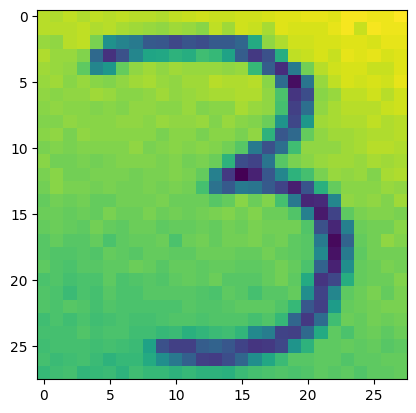

1/1 [==============================] - 0s 17ms/step
Image: 4 and Prediction class: 8


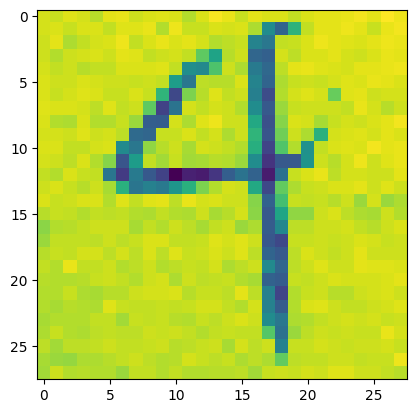

1/1 [==============================] - 0s 17ms/step
Image: 4 and Prediction class: 8


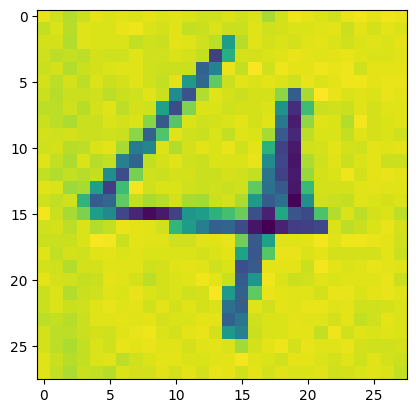

1/1 [==============================] - 0s 31ms/step
Image: 4 and Prediction class: 3


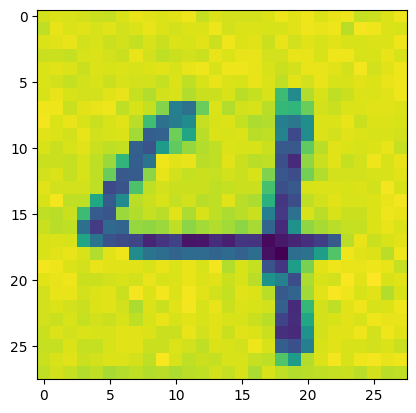

1/1 [==============================] - 0s 18ms/step
Image: 5 and Prediction class: 3


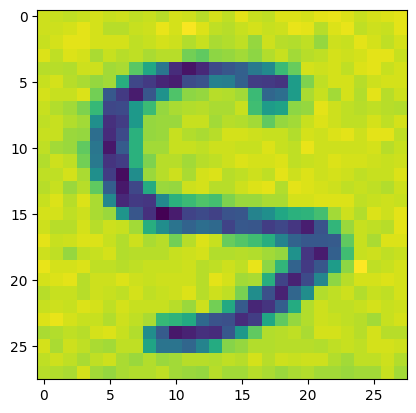

1/1 [==============================] - 0s 28ms/step
Image: 5 and Prediction class: 3


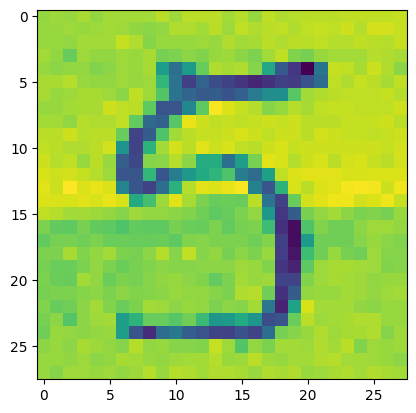

1/1 [==============================] - 0s 27ms/step
Image: 5 and Prediction class: 3


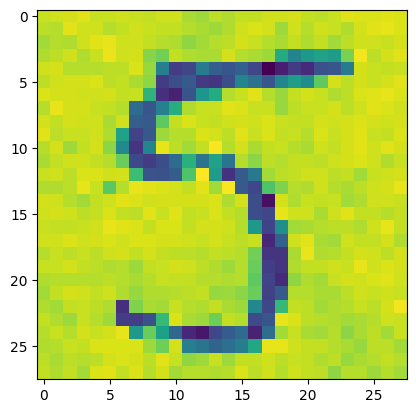

1/1 [==============================] - 0s 26ms/step
Image: 6 and Prediction class: 6


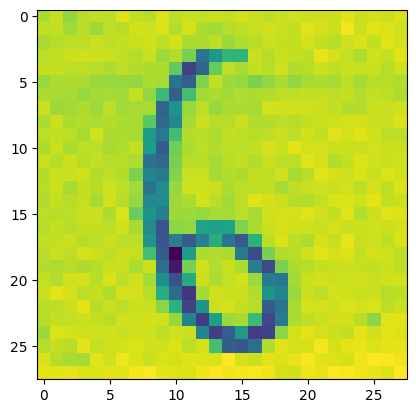

1/1 [==============================] - 0s 23ms/step
Image: 6 and Prediction class: 6


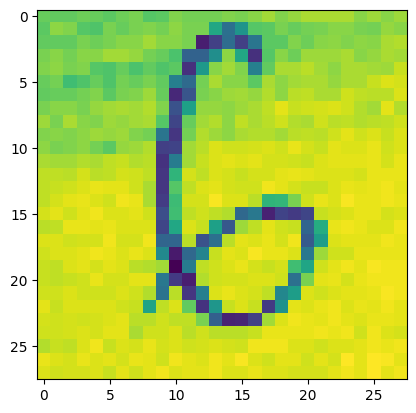

1/1 [==============================] - 0s 17ms/step
Image: 6 and Prediction class: 5


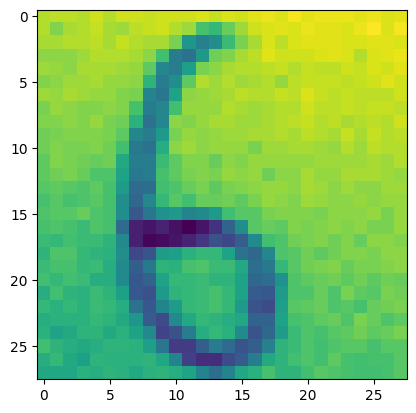

1/1 [==============================] - 0s 17ms/step
Image: 7 and Prediction class: 8


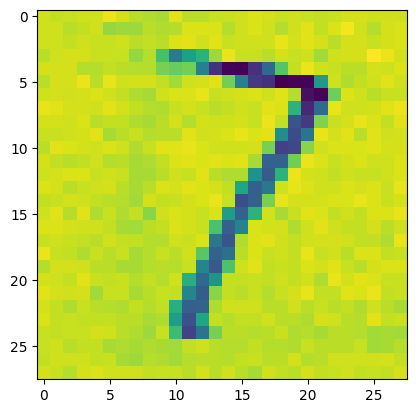

1/1 [==============================] - 0s 17ms/step
Image: 7 and Prediction class: 7


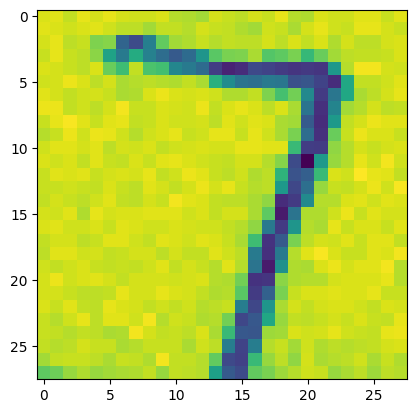

1/1 [==============================] - 0s 20ms/step
Image: 7 and Prediction class: 8


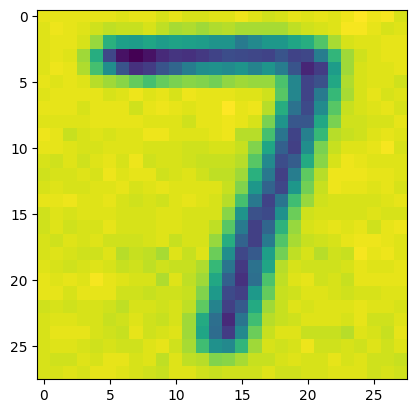

1/1 [==============================] - 0s 16ms/step
Image: 8 and Prediction class: 8


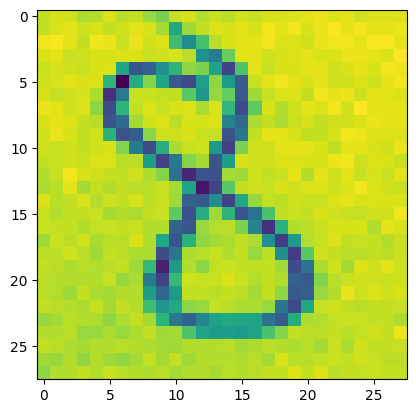

1/1 [==============================] - 0s 17ms/step
Image: 8 and Prediction class: 8


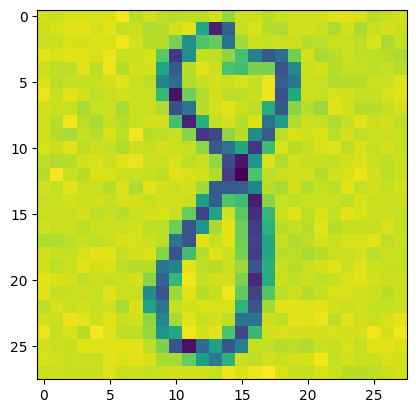

1/1 [==============================] - 0s 17ms/step
Image: 8 and Prediction class: 8


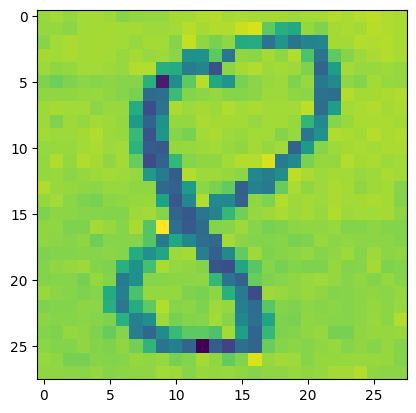

1/1 [==============================] - 0s 18ms/step
Image: 9 and Prediction class: 2


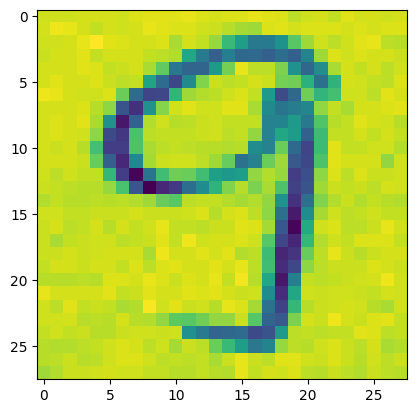

1/1 [==============================] - 0s 17ms/step
Image: 9 and Prediction class: 8


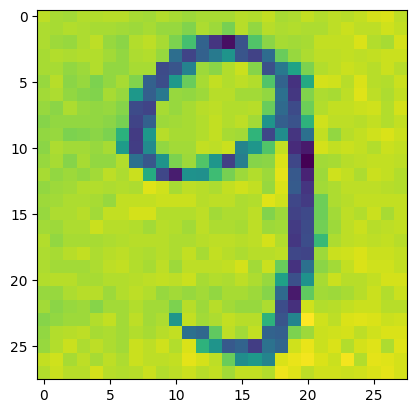

1/1 [==============================] - 0s 17ms/step
Image: 9 and Prediction class: 8


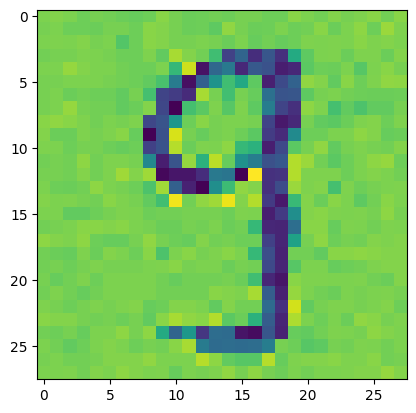

Số lượng dự đoán đúng: 24
Số lượng dự đoán sai: 66
Tỉ lệ: 0.26666666666666666


In [5]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/AI/Handwritten Digits/final_model.h5'
model = load_model(model_path)

def run_model(folder_path):
   correct = 0  # Correct predictions
   incorrect = 0  # Incorrect predictions


   for sinhvien_folder in os.listdir(folder_path):  # Read folders inside 'sinhvien'
       sinhvien_folder_path = os.path.join(folder_path, sinhvien_folder)  # Join folder_path with sinhvien_folder
       for num_folder in os.listdir(sinhvien_folder_path):  # Read folders inside each student folder
           num_folder_path = os.path.join(sinhvien_folder_path, num_folder)  # Join sinhvien_folder with num_folder
           for filename in os.listdir(num_folder_path):  # Read files inside the number folder
               if filename.endswith('.jpg') or filename.endswith('.png'):  # Check if the file is an image
                   image_path = os.path.join(num_folder_path, filename)
                   real_label = int(filename[0])  # Extract the real label from the filename
                   img = load_image(image_path)

                   # Make predictions using the model
                   prediction = model.predict(img)
                   digit = np.argmax(prediction)  # Get the predicted class


                   print(f'Image: {real_label} and Prediction class: {digit}')


                   # Display the image
                   plt.imshow(img.reshape(28, 28, 1))
                   plt.show()


                   # Update correct and incorrect counts
                   if digit == real_label:
                       correct += 1
                   else:
                       incorrect += 1


   return correct, incorrect

folder_path = '/content/drive/MyDrive/AI/Handwritten Digits/Data/Data_Actual'

example_correct, example_incorrect = run_model(folder_path)
print(f'Số lượng dự đoán đúng: {example_correct}')
print(f'Số lượng dự đoán sai: {example_incorrect}')
print(f'Tỉ lệ: {example_correct / (example_correct + example_incorrect)}' )


**Như vậy ta có thể thấy, với các hàm đã cho sẵn, tỉ lệ dự đoán chính xác của model trên là 24/90 ảnh hay tỉ lệ chính xác là: 0.26666**



---


Dưới đây là code của tụi em, tụi em dùng 1 hàm load_image mới:
Hàm **load_and_preprocess_image**.

**Hàm load_and_preprocess_image thực hiện thêm bước chuyển đổi ảnh sang nhị phân bằng cách tính toán ngưỡng (threshold_value), giúp ảnh đầu vào phù hợp hơn với yêu cầu của mô hình.**

**Hàm này thực hiện các bước tương tự load_image nhưng có thêm bước xử lý ngưỡng để chuyển đổi ảnh thành ảnh nhị phân.**

*   Giống với load_image cho đến khi chuyển thành ảnh mảng img_array.
*   Tính tổng giá trị pixel của ảnh (pixel_sum).
*   Tính toán giá trị ngưỡng threshold_value dựa trên tổng pixel.
*   Chuyển đổi ảnh thành ảnh nhị phân dựa trên ngưỡng (binary_image).
*   Các bước còn lại giống load_image.


---



1/1 [==============================] - 0s 18ms/step
Image: 0 and Prediction class: 0


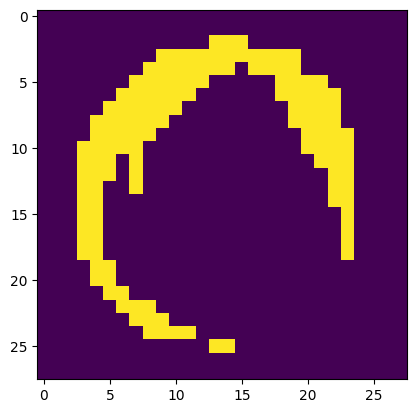

1/1 [==============================] - 0s 17ms/step
Image: 0 and Prediction class: 0


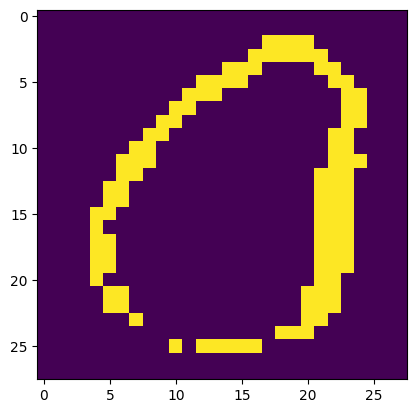

1/1 [==============================] - 0s 19ms/step
Image: 0 and Prediction class: 0


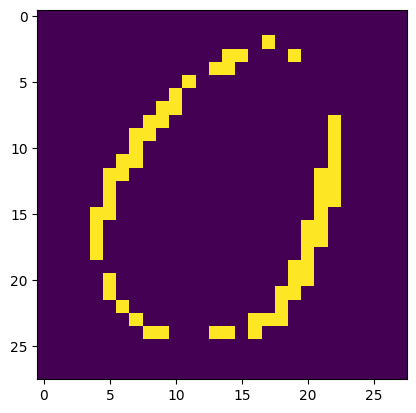

1/1 [==============================] - 0s 20ms/step
Image: 1 and Prediction class: 1


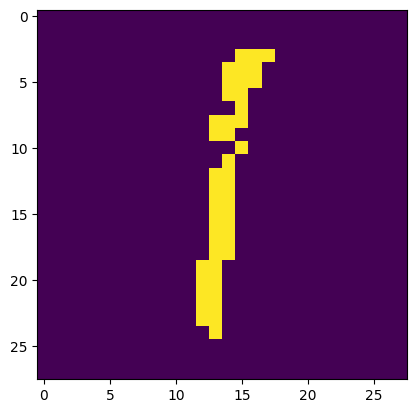

1/1 [==============================] - 0s 20ms/step
Image: 1 and Prediction class: 1


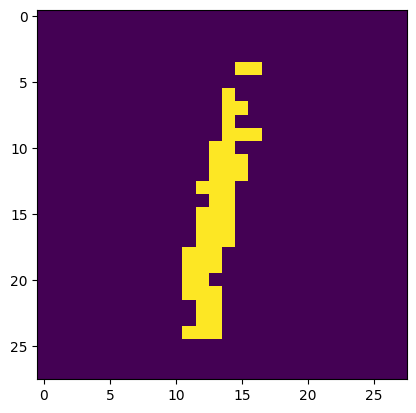

1/1 [==============================] - 0s 18ms/step
Image: 1 and Prediction class: 1


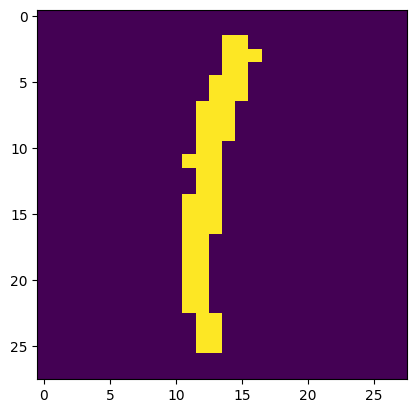

1/1 [==============================] - 0s 17ms/step
Image: 2 and Prediction class: 2


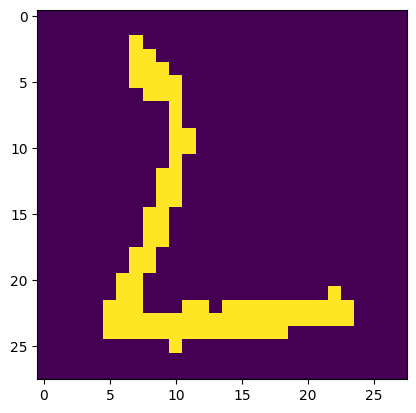

1/1 [==============================] - 0s 17ms/step
Image: 2 and Prediction class: 2


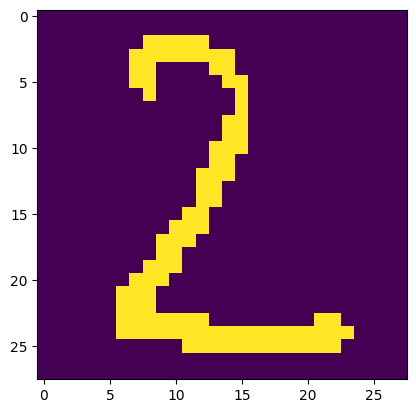

1/1 [==============================] - 0s 17ms/step
Image: 2 and Prediction class: 2


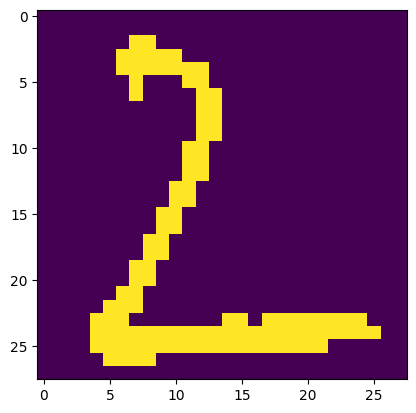

1/1 [==============================] - 0s 18ms/step
Image: 3 and Prediction class: 3


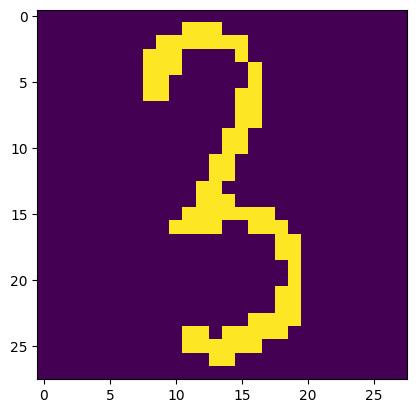

1/1 [==============================] - 0s 17ms/step
Image: 3 and Prediction class: 3


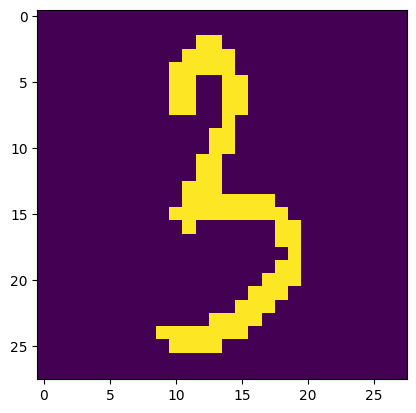

1/1 [==============================] - 0s 19ms/step
Image: 3 and Prediction class: 3


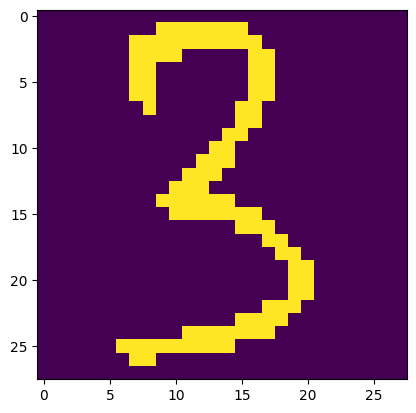

1/1 [==============================] - 0s 16ms/step
Image: 4 and Prediction class: 4


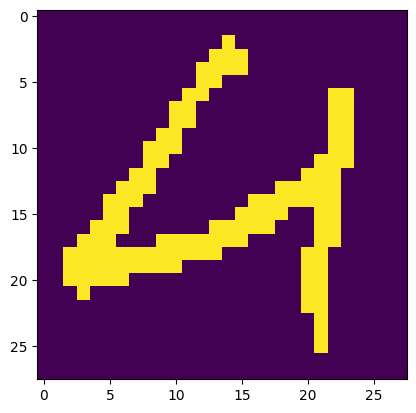

1/1 [==============================] - 0s 18ms/step
Image: 4 and Prediction class: 4


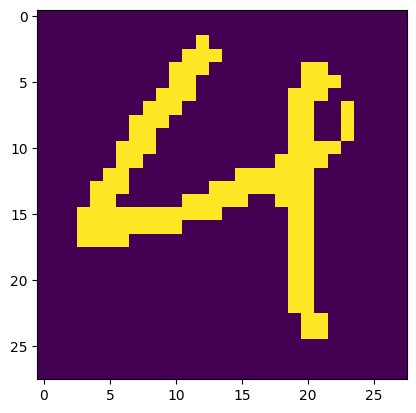

1/1 [==============================] - 0s 17ms/step
Image: 4 and Prediction class: 4


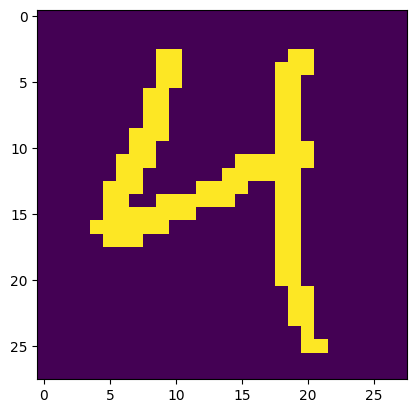

1/1 [==============================] - 0s 22ms/step
Image: 5 and Prediction class: 5


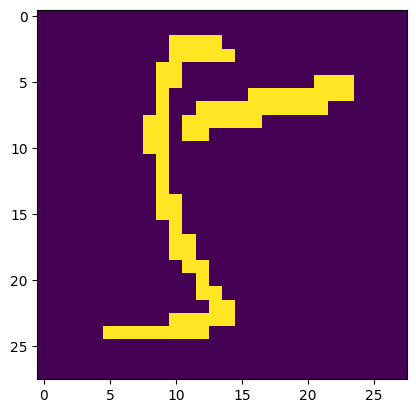

1/1 [==============================] - 0s 18ms/step
Image: 5 and Prediction class: 5


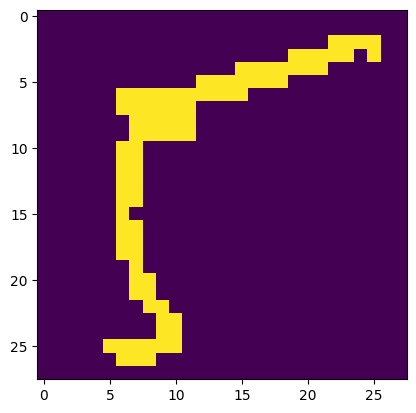

1/1 [==============================] - 0s 17ms/step
Image: 5 and Prediction class: 5


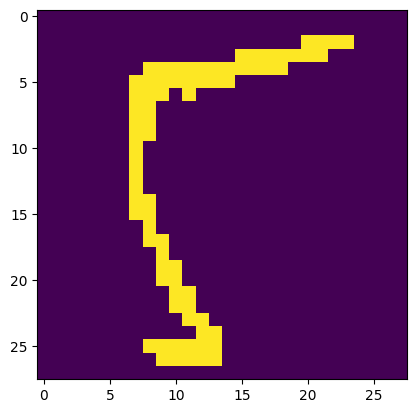

1/1 [==============================] - 0s 25ms/step
Image: 6 and Prediction class: 6


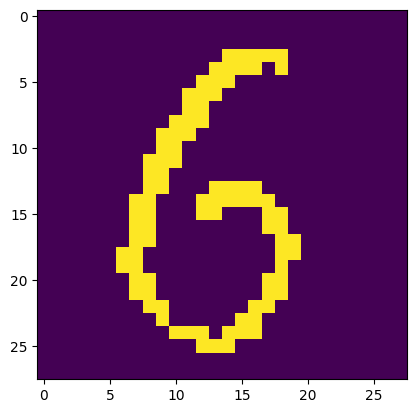

1/1 [==============================] - 0s 24ms/step
Image: 6 and Prediction class: 6


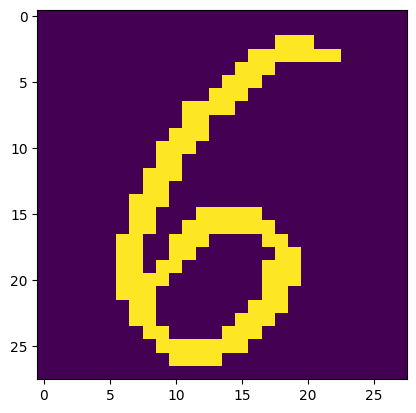

1/1 [==============================] - 0s 29ms/step
Image: 6 and Prediction class: 6


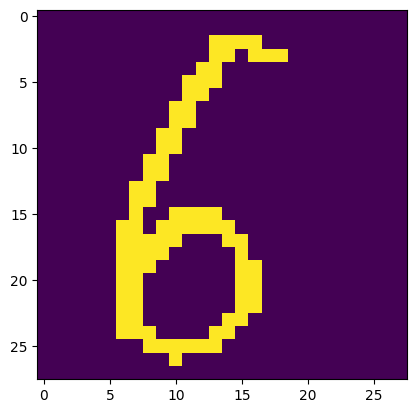

1/1 [==============================] - 0s 25ms/step
Image: 7 and Prediction class: 7


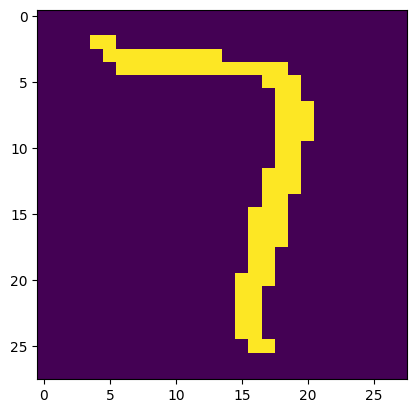

1/1 [==============================] - 0s 27ms/step
Image: 7 and Prediction class: 7


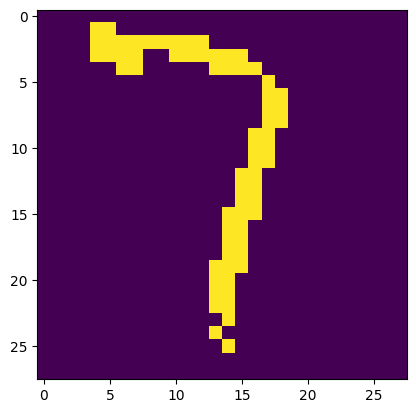

1/1 [==============================] - 0s 25ms/step
Image: 7 and Prediction class: 7


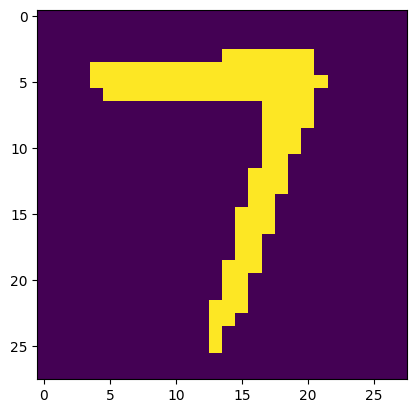

1/1 [==============================] - 0s 23ms/step
Image: 8 and Prediction class: 8


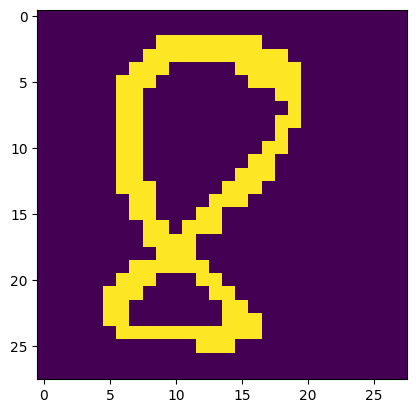

1/1 [==============================] - 0s 30ms/step
Image: 8 and Prediction class: 8


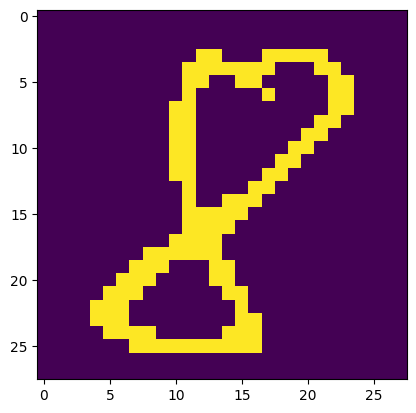

1/1 [==============================] - 0s 28ms/step
Image: 8 and Prediction class: 8


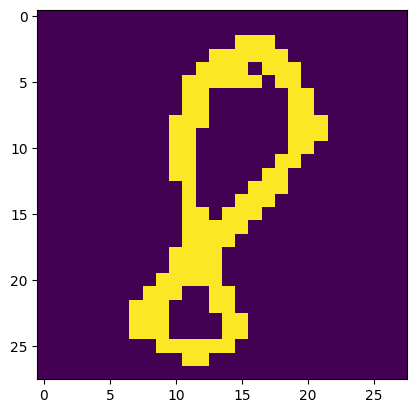

1/1 [==============================] - 0s 28ms/step
Image: 9 and Prediction class: 4


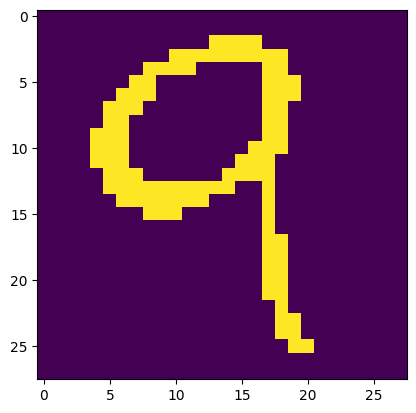

1/1 [==============================] - 0s 17ms/step
Image: 9 and Prediction class: 4


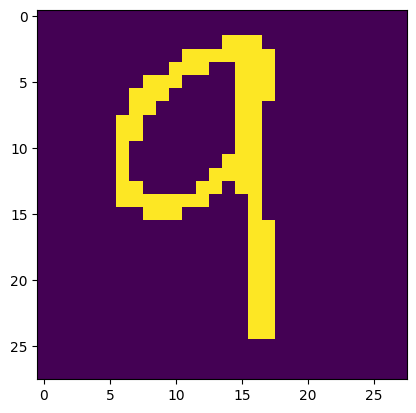

1/1 [==============================] - 0s 19ms/step
Image: 9 and Prediction class: 4


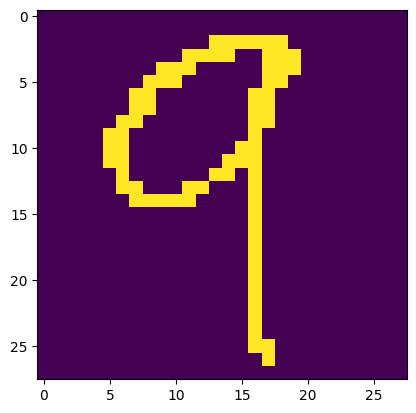

1/1 [==============================] - 0s 17ms/step
Image: 0 and Prediction class: 0


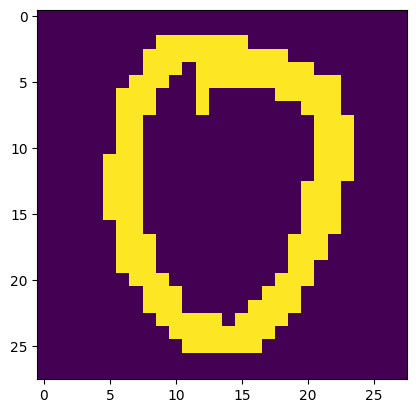

1/1 [==============================] - 0s 18ms/step
Image: 0 and Prediction class: 0


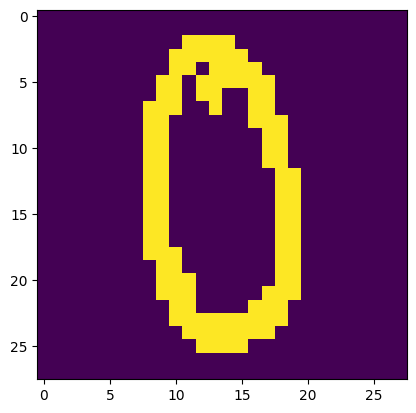

1/1 [==============================] - 0s 17ms/step
Image: 0 and Prediction class: 0


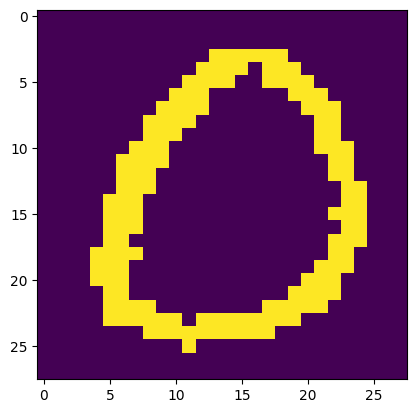

1/1 [==============================] - 0s 18ms/step
Image: 1 and Prediction class: 1


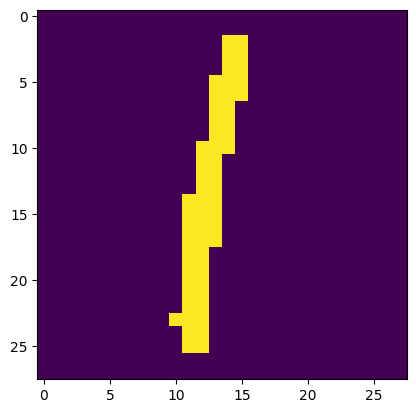

1/1 [==============================] - 0s 17ms/step
Image: 1 and Prediction class: 1


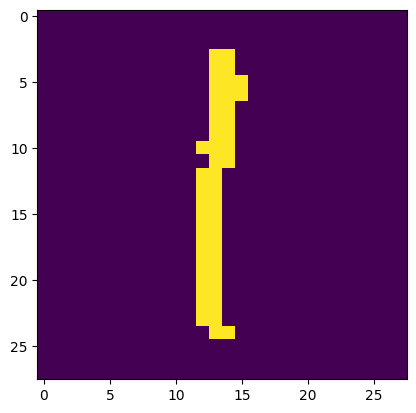

1/1 [==============================] - 0s 19ms/step
Image: 1 and Prediction class: 1


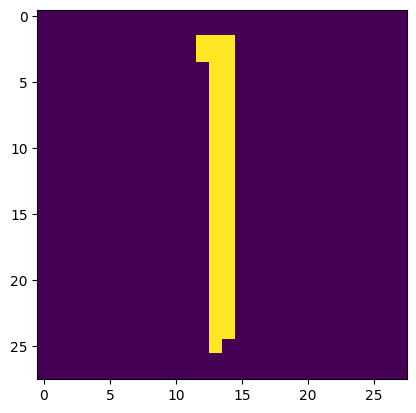

1/1 [==============================] - 0s 18ms/step
Image: 2 and Prediction class: 2


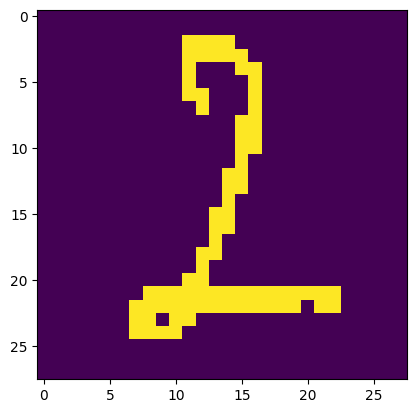

1/1 [==============================] - 0s 18ms/step
Image: 2 and Prediction class: 2


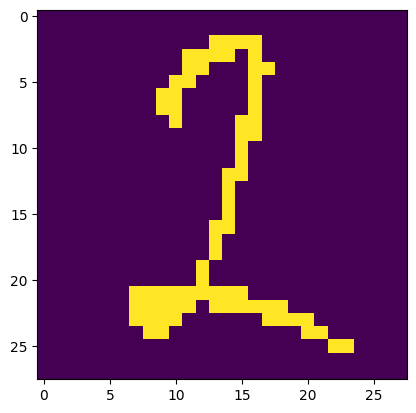

1/1 [==============================] - 0s 19ms/step
Image: 2 and Prediction class: 2


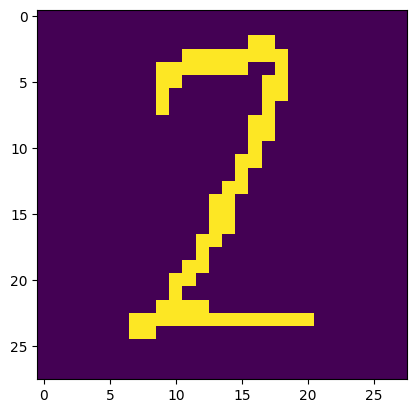

1/1 [==============================] - 0s 19ms/step
Image: 3 and Prediction class: 3


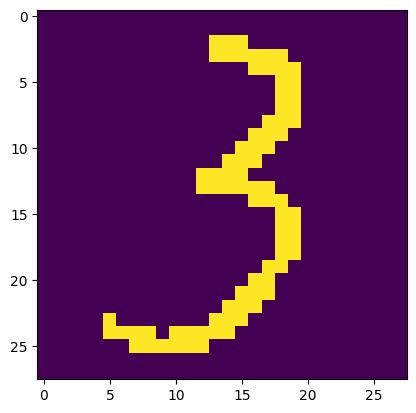

1/1 [==============================] - 0s 23ms/step
Image: 3 and Prediction class: 3


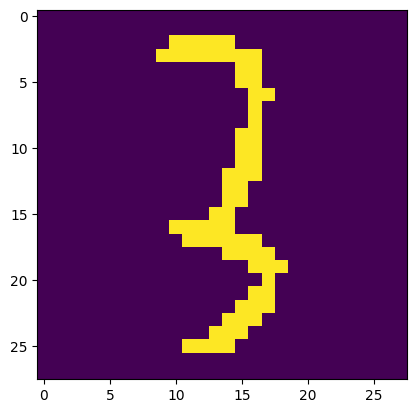

1/1 [==============================] - 0s 18ms/step
Image: 3 and Prediction class: 3


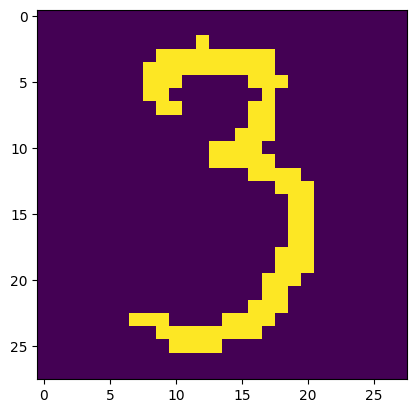

1/1 [==============================] - 0s 17ms/step
Image: 4 and Prediction class: 4


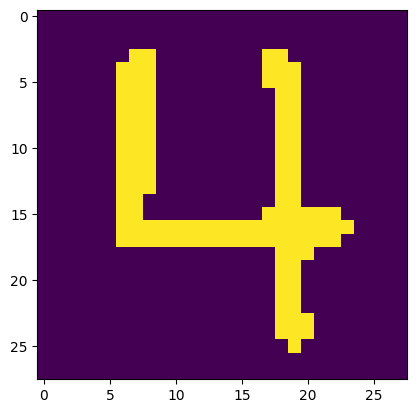

1/1 [==============================] - 0s 17ms/step
Image: 4 and Prediction class: 4


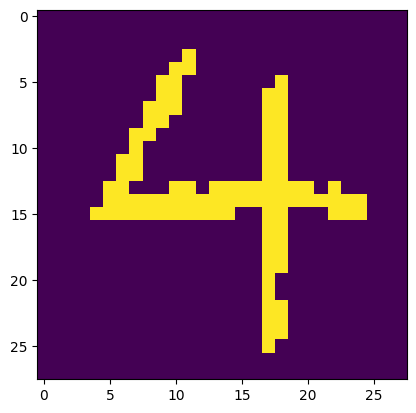

1/1 [==============================] - 0s 17ms/step
Image: 4 and Prediction class: 4


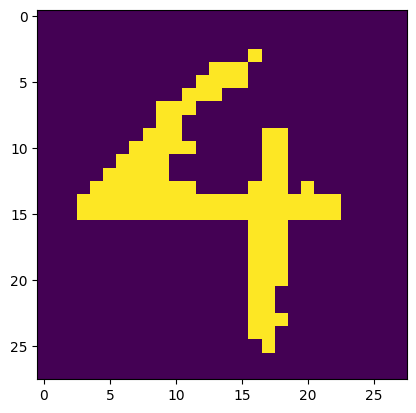

1/1 [==============================] - 0s 18ms/step
Image: 5 and Prediction class: 5


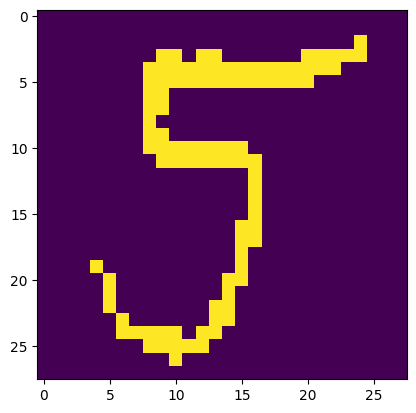

1/1 [==============================] - 0s 18ms/step
Image: 5 and Prediction class: 5


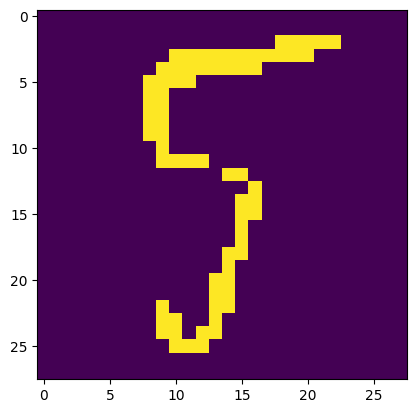

1/1 [==============================] - 0s 18ms/step
Image: 5 and Prediction class: 5


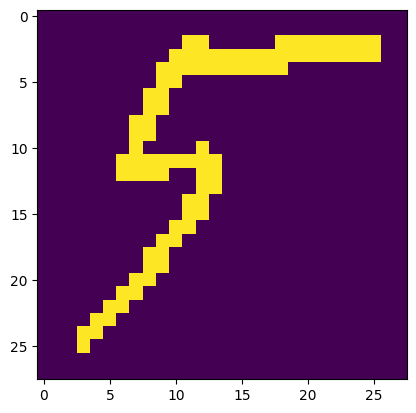

1/1 [==============================] - 0s 18ms/step
Image: 6 and Prediction class: 6


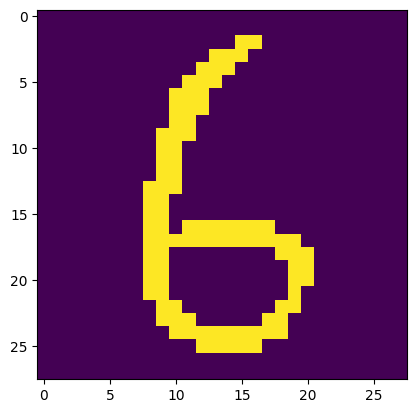

1/1 [==============================] - 0s 17ms/step
Image: 6 and Prediction class: 6


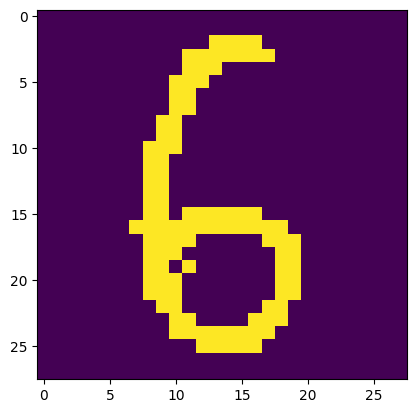

1/1 [==============================] - 0s 18ms/step
Image: 6 and Prediction class: 6


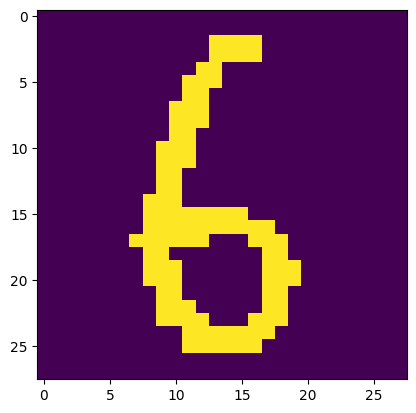

1/1 [==============================] - 0s 18ms/step
Image: 7 and Prediction class: 7


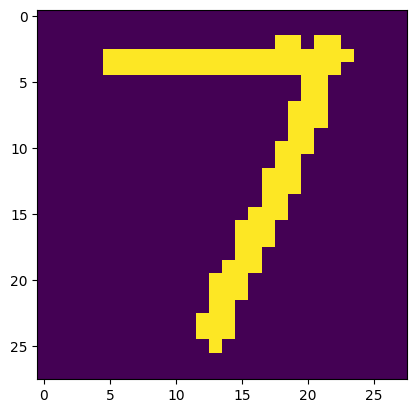

1/1 [==============================] - 0s 17ms/step
Image: 7 and Prediction class: 7


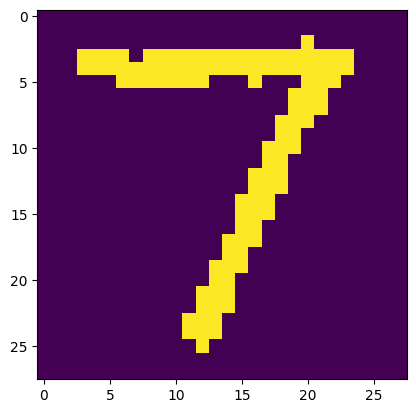

1/1 [==============================] - 0s 21ms/step
Image: 7 and Prediction class: 7


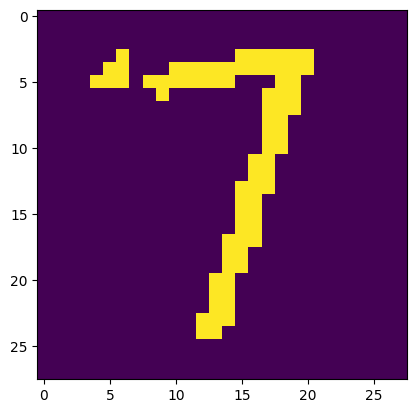

1/1 [==============================] - 0s 18ms/step
Image: 8 and Prediction class: 8


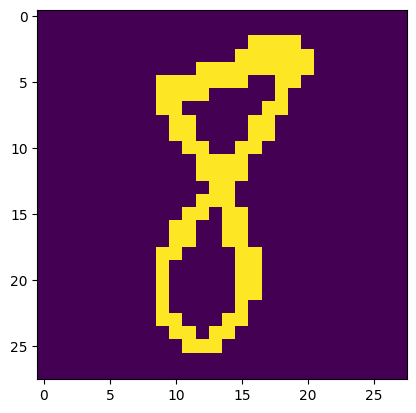

1/1 [==============================] - 0s 18ms/step
Image: 8 and Prediction class: 8


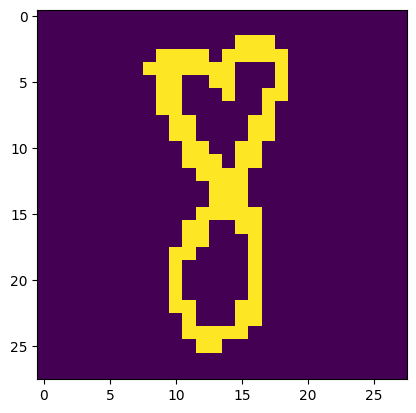

1/1 [==============================] - 0s 18ms/step
Image: 8 and Prediction class: 8


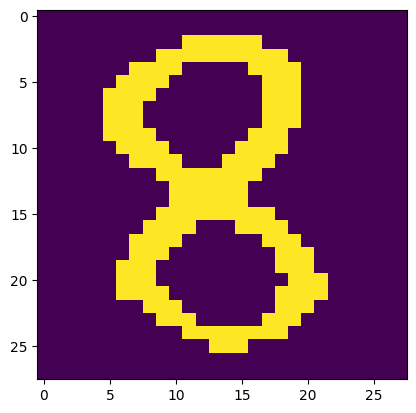

1/1 [==============================] - 0s 18ms/step
Image: 9 and Prediction class: 9


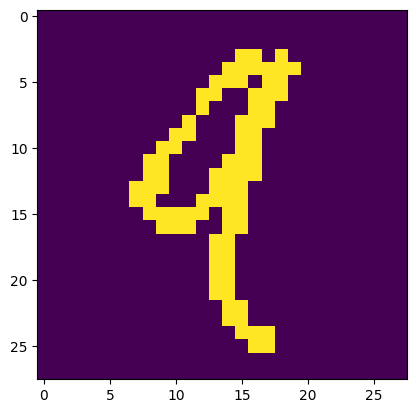

1/1 [==============================] - 0s 18ms/step
Image: 9 and Prediction class: 7


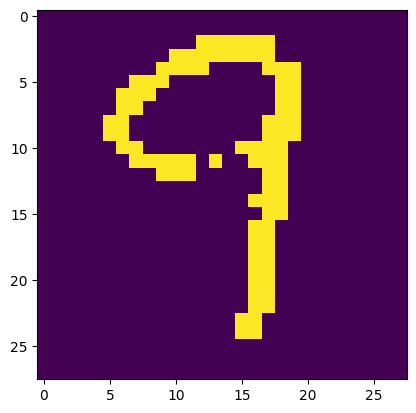

1/1 [==============================] - 0s 18ms/step
Image: 9 and Prediction class: 7


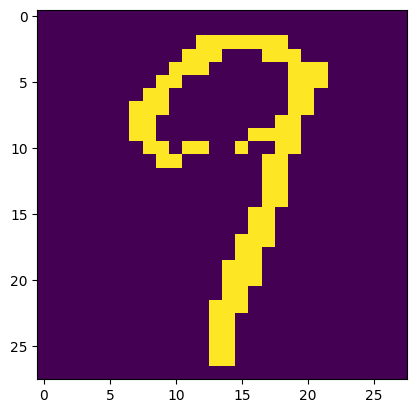

1/1 [==============================] - 0s 19ms/step
Image: 0 and Prediction class: 0


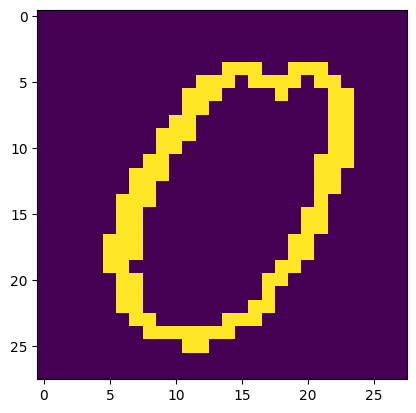

1/1 [==============================] - 0s 18ms/step
Image: 0 and Prediction class: 0


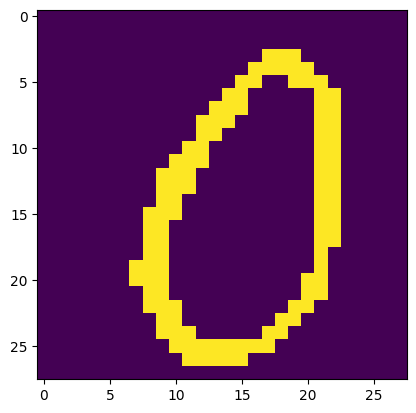

1/1 [==============================] - 0s 17ms/step
Image: 0 and Prediction class: 0


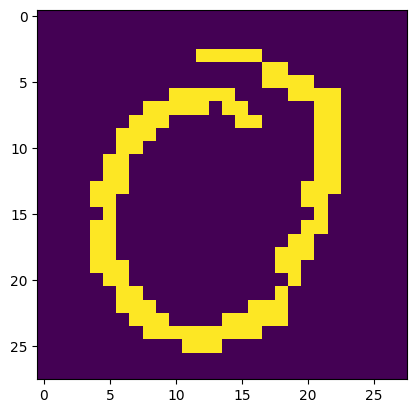

1/1 [==============================] - 0s 17ms/step
Image: 1 and Prediction class: 1


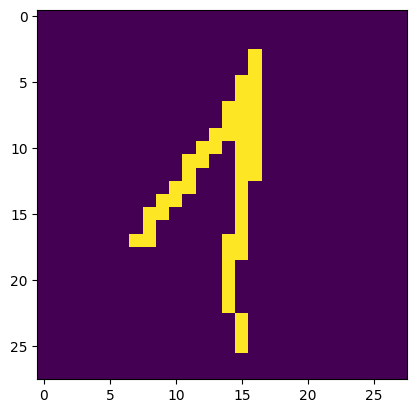

1/1 [==============================] - 0s 17ms/step
Image: 1 and Prediction class: 1


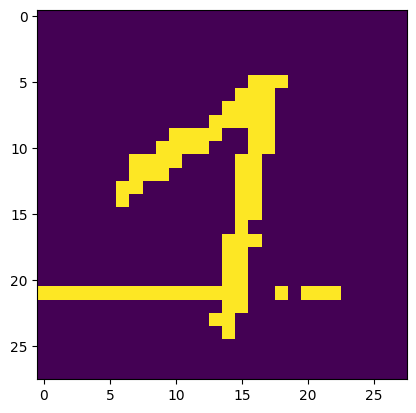

1/1 [==============================] - 0s 18ms/step
Image: 1 and Prediction class: 1


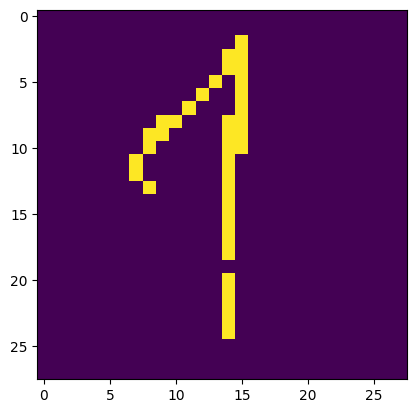

1/1 [==============================] - 0s 17ms/step
Image: 2 and Prediction class: 2


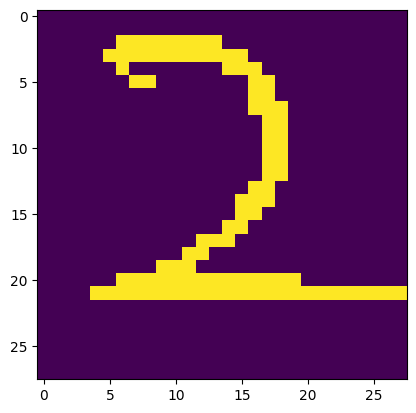

1/1 [==============================] - 0s 17ms/step
Image: 2 and Prediction class: 2


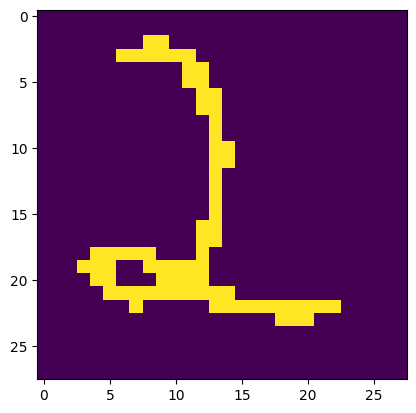

1/1 [==============================] - 0s 26ms/step
Image: 2 and Prediction class: 2


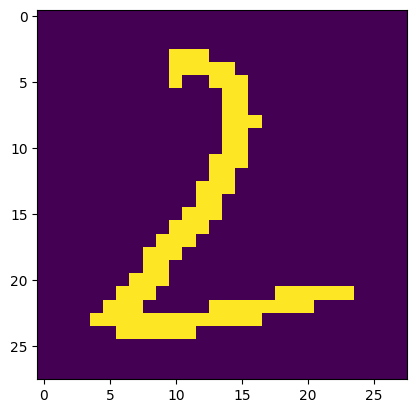

1/1 [==============================] - 0s 38ms/step
Image: 3 and Prediction class: 3


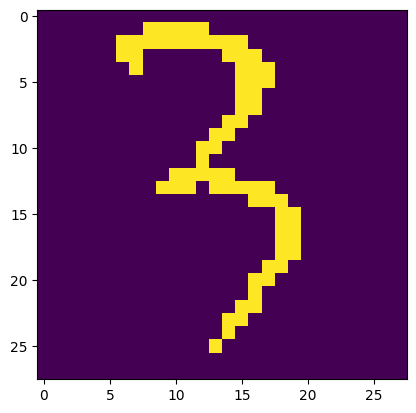

1/1 [==============================] - 0s 25ms/step
Image: 3 and Prediction class: 3


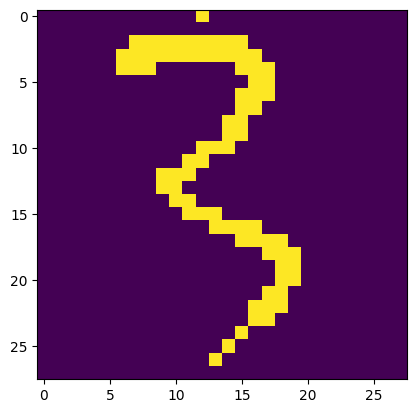

1/1 [==============================] - 0s 24ms/step
Image: 3 and Prediction class: 3


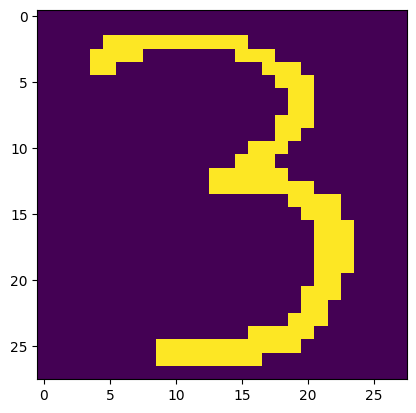

1/1 [==============================] - 0s 26ms/step
Image: 4 and Prediction class: 4


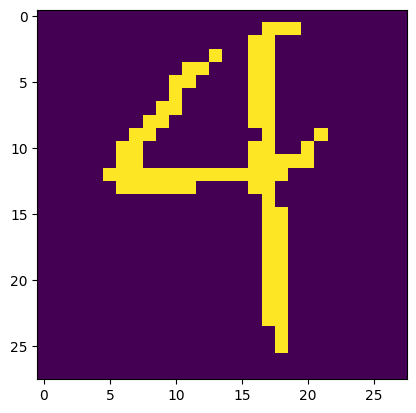

1/1 [==============================] - 0s 25ms/step
Image: 4 and Prediction class: 4


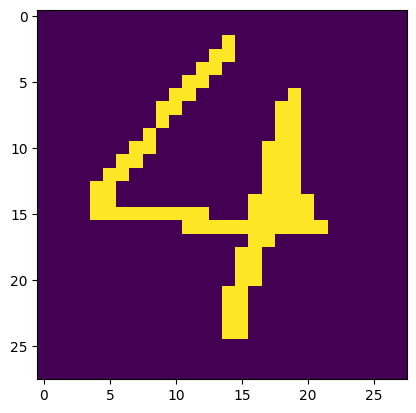

1/1 [==============================] - 0s 27ms/step
Image: 4 and Prediction class: 4


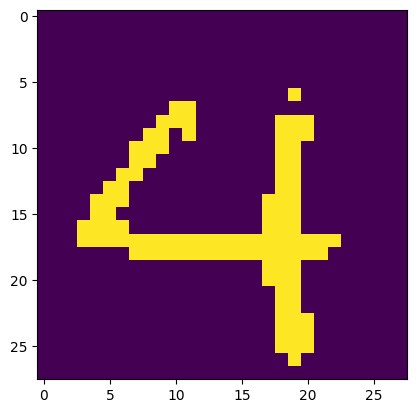

1/1 [==============================] - 0s 31ms/step
Image: 5 and Prediction class: 5


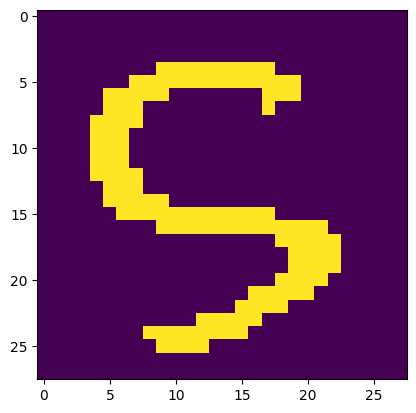

1/1 [==============================] - 0s 26ms/step
Image: 5 and Prediction class: 5


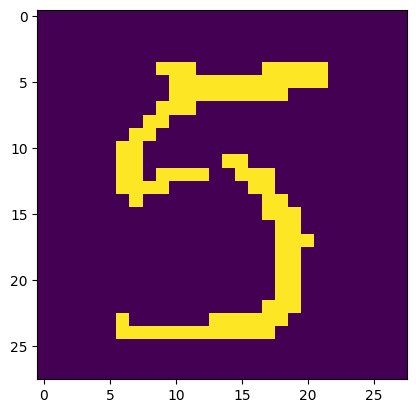

1/1 [==============================] - 0s 26ms/step
Image: 5 and Prediction class: 5


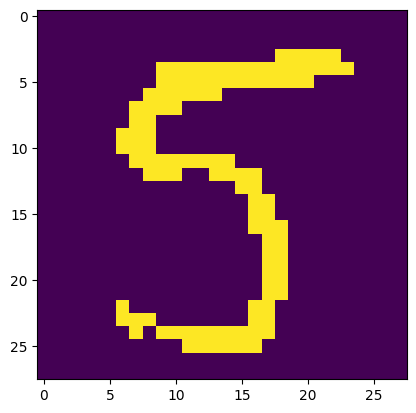

1/1 [==============================] - 0s 17ms/step
Image: 6 and Prediction class: 6


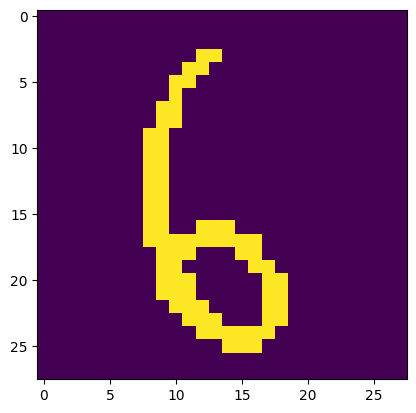

1/1 [==============================] - 0s 17ms/step
Image: 6 and Prediction class: 6


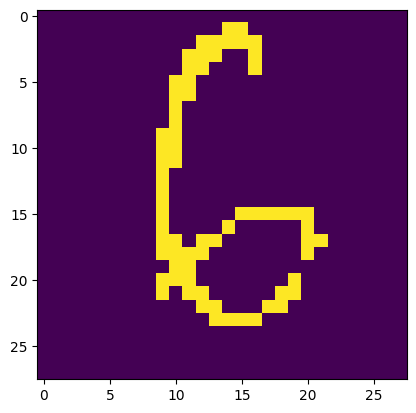

1/1 [==============================] - 0s 17ms/step
Image: 6 and Prediction class: 6


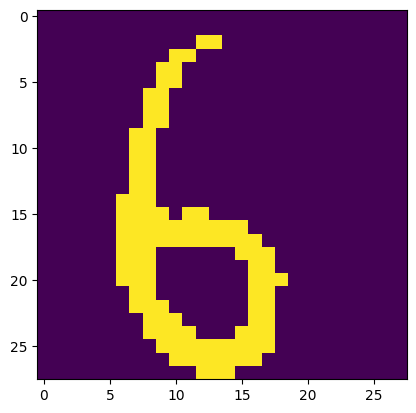

1/1 [==============================] - 0s 17ms/step
Image: 7 and Prediction class: 7


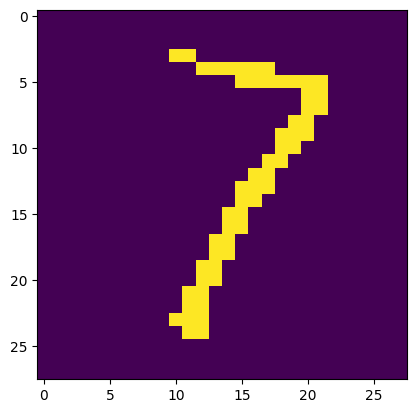

1/1 [==============================] - 0s 27ms/step
Image: 7 and Prediction class: 7


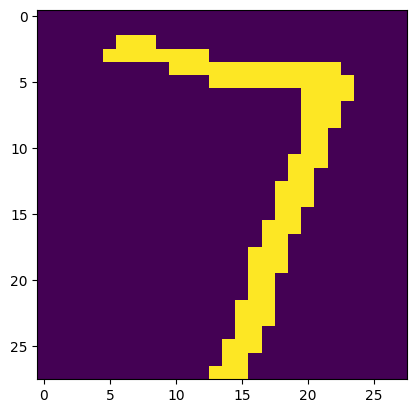

1/1 [==============================] - 0s 17ms/step
Image: 7 and Prediction class: 7


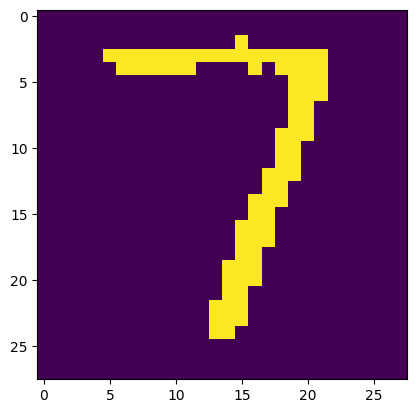

1/1 [==============================] - 0s 17ms/step
Image: 8 and Prediction class: 8


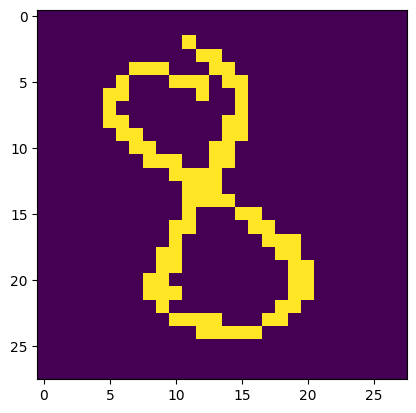

1/1 [==============================] - 0s 17ms/step
Image: 8 and Prediction class: 8


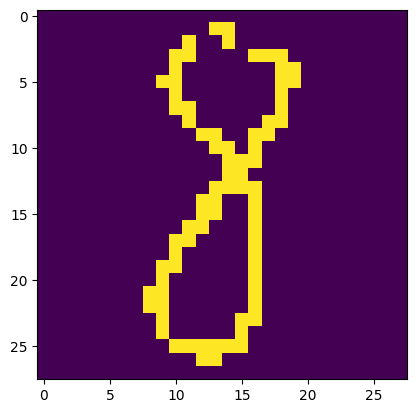

1/1 [==============================] - 0s 17ms/step
Image: 8 and Prediction class: 8


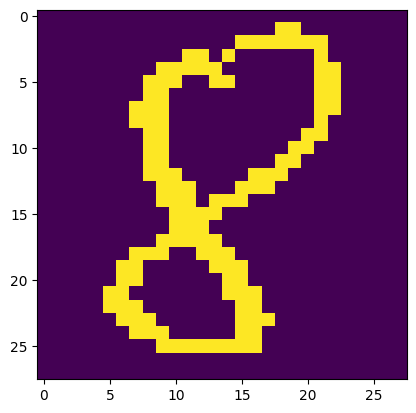

1/1 [==============================] - 0s 17ms/step
Image: 9 and Prediction class: 3


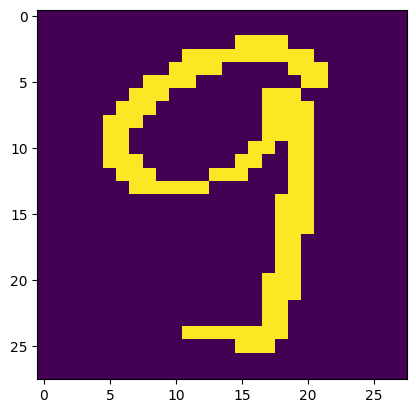

1/1 [==============================] - 0s 18ms/step
Image: 9 and Prediction class: 3


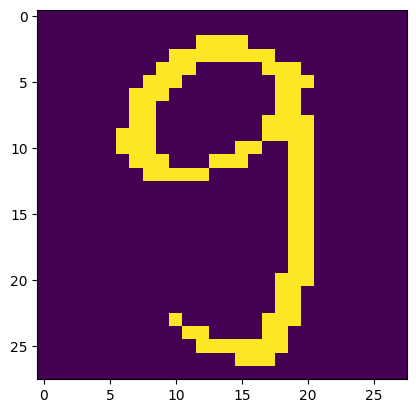

1/1 [==============================] - 0s 16ms/step
Image: 9 and Prediction class: 3


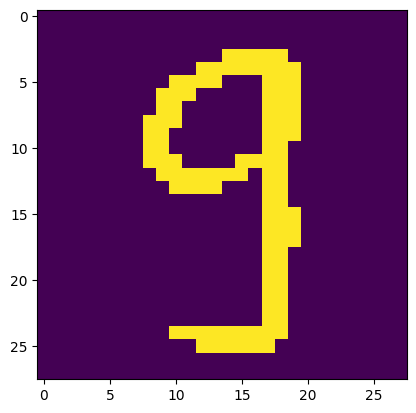

Số lượng dự đoán đúng: 82
Số lượng dự đoán sai: 8
Tỉ lệ: 0.9111111111111111


In [16]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path):
   # Load the image in grayscale and resize it to 28x28 pixels
   img = load_img(image_path, grayscale=True, target_size=(28, 28))

   # Calculate the pixel sum and determine the threshold value
   pixel_sum = np.array(img).sum()
   threshold_value = pixel_sum / (28**2)

   # Convert the image to binary based on the threshold
   binary_image = img.point(lambda x: 255 if x < threshold_value - (threshold_value / 6.6) else 0)

   # Convert the image to an array
   img_array = img_to_array(binary_image)

   # Reshape the array to match the model input shape
   img_array = img_array.reshape(1, 28, 28, 1)

   # Normalize pixel values to the range [0, 1]
   img_array = img_array.astype('float32') / 255.0

   return img_array

def run_model(folder_path):
   correct = 0  # Correct predictions
   incorrect = 0  # Incorrect predictions


   for sinhvien_folder in os.listdir(folder_path):  # Read folders inside 'sinhvien'
       sinhvien_folder_path = os.path.join(folder_path, sinhvien_folder)  # Join folder_path with sinhvien_folder
       for num_folder in os.listdir(sinhvien_folder_path):  # Read folders inside each student folder
           num_folder_path = os.path.join(sinhvien_folder_path, num_folder)  # Join sinhvien_folder with num_folder
           for filename in os.listdir(num_folder_path):  # Read files inside the number folder
               if filename.endswith('.jpg') or filename.endswith('.png'):  # Check if the file is an image
                   image_path = os.path.join(num_folder_path, filename)
                   real_label = int(filename[0])  # Extract the real label from the filename
                   img = load_and_preprocess_image(image_path)  # Load and preprocess the image


                   # Make predictions using the model
                   prediction = model.predict(img)
                   digit = np.argmax(prediction)  # Get the predicted class


                   print(f'Image: {real_label} and Prediction class: {digit}')


                   # Display the image
                   plt.imshow(img.reshape(28, 28, 1))
                   plt.show()


                   # Update correct and incorrect counts
                   if digit == real_label:
                       correct += 1
                   else:
                       incorrect += 1


   return correct, incorrect


# Call function and print output
folder_path = '/content/drive/MyDrive/AI/Handwritten Digits/Data/Data_Actual'

correct, incorrect = run_model(folder_path)
print(f'Số lượng dự đoán đúng: {correct}')
print(f'Số lượng dự đoán sai: {incorrect}')
print(f'Tỉ lệ: {correct / (correct + incorrect)}' )

Sau khi dùng hàm **load_and_preprocess_image** ta thấy hiệu quả tăng rõ rệt. Sử dụng hàm **load_and_preprocess_image** đảm bảo ảnh đầu vào được chuẩn bị tốt hơn cho quá trình dự đoán của mô hình.

Với tỉ lệ dự đoán chính xác là 82/90 ảnh ≈ 0.9111111111111111  >  phương pháp cũ (0.26666666666666666)